# WINE DATASET CLUSTERING ANALYSIS

<font size="4">IMPORT DATA WRANGLING LIBRARIES</font>


In [1]:
## Import data wrangling libraries
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
import random as rnd
from numpy.linalg import eig


<font size="4">IMPORT VISUALIZATIONS LIBRARIES</font>

In [2]:
## Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
from matplotlib.pyplot import MultipleLocator

## Import interactive Bokeh libraries
from bokeh.io import push_notebook, show, output_notebook
from bokeh.palettes import Category20c
from bokeh.layouts import row 
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.io import show
import pandas_bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.plotting import figure, output_file, show
from bokeh.models.widgets import DataTable, TableColumn
pandas_bokeh.output_notebook()
from bokeh.plotting import output_file, show


Loading BokehJS ...

<font size="4">IMPORT CLUSTERING MODELS</font>

In [3]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AffinityPropagation, AgglomerativeClustering,DBSCAN
import scipy.cluster.hierarchy as sch

<font size="4">IMPORT PRE-PROCESSING AND EVALUATION LIBRARIES</font>

In [4]:
# Import evaluation/preprocessing libraries
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn import metrics


<font size="4">LOADING DATA</font>

In [5]:
## Lodining data into pandas dataframe

# Define the column names
column_names = ['Class','Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium', 'Total Phenols', 'Flavanoids',
                'Nonflavanoid Phenols', 'Proanthocyanins', 'Color Intensity', 'Hue', 'OD280/OD315 of diluted wines',
                'Proline']

# Load the "wine.data" CSV file with custom column names
wine = pd.read_csv('C:/Users/h207171/OneDrive - Halliburton/Documents/Sunil/bbp/SP/Applied Machine Learning/CA2/wine.data', names=column_names)
wine =wine.iloc[:,0:len(wine)] # data retrieval

pd.set_option('display.max_columns', 20) # display 12 columns
pd.set_option('display.max_rows', 10) # display 10 rows
pd.set_option('display.width', 1000) # display 1000 charactors

## EXPLORATORY ANALYSIS


In [6]:
wine.info() # Wine dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of Ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total Phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid Phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color Intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

<font size="3">The wine dataset contain 14 columns with 178 rows as shown above. There are 11 float64 and 3 int64 data type exists.  </font>

In [7]:
skewness= wine.skew() # Checking the skew of the data

skew_wine = pd.DataFrame({'Feature': skewness.index, 'Skewness': skewness.values})
#print(skew_wine.head(14))
print(skew_wine.head(14).to_string(index=False))


                     Feature  Skewness
                       Class  0.107431
                     Alcohol -0.051482
                  Malic Acid  1.039651
                         Ash -0.176699
           Alcalinity of Ash  0.213047
                   Magnesium  1.098191
               Total Phenols  0.086639
                  Flavanoids  0.025344
        Nonflavanoid Phenols  0.450151
             Proanthocyanins  0.517137
             Color Intensity  0.868585
                         Hue  0.021091
OD280/OD315 of diluted wines -0.307285
                     Proline  0.767822


<font size="3">
    
By using the skewness function, we can further analyze the distribution of data for each feature in the dataset.

The skewness of a feature indicates the asymmetry or lack of symmetry in its distribution. A skewness value of 0 represents a perfectly balanced distribution.

If a feature has a positive skewness, it means that the distribution has a longer tail on the right side, indicating more data points towards the left. On the other hand, a negative skewness indicates a longer tail on the left side, indicating more data points towards the right.

Based on the skewness values calculated for the wine dataset, we can make the following observations:

Proline, Color_Intensity, Magnesium, and Malic_Acid have significant positive skewness, indicating a higher concentration of data towards the lower values. This means that the majority of the data points for these features are located towards the left side of the distribution.

OD280 has the highest negative skewness, indicating a higher concentration of data towards the higher values. This means that the majority of the data points for this feature are located towards the right side of the distribution.

The remaining features have skewness values close to 0, indicating approximately balanced distributions. These features have relatively similar proportions of data points on both sides of the distribution.
    
</font>

In [8]:
wine.head() # Wine data top 5 rows

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
wine.tail() # Wine data bottom 5 rows

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [10]:
print('Shape of the train dataset:', wine.shape) ## get the shape of the train data

Shape of the train dataset: (178, 14)


In [11]:
print('Columns of wine dataset:',wine.columns.values) # get column values of train data

Columns of wine dataset: ['Class' 'Alcohol' 'Malic Acid' 'Ash' 'Alcalinity of Ash' 'Magnesium'
 'Total Phenols' 'Flavanoids' 'Nonflavanoid Phenols' 'Proanthocyanins'
 'Color Intensity' 'Hue' 'OD280/OD315 of diluted wines' 'Proline']


In [12]:
## Check wine class count
df1 = wine.groupby('Class')['Class'].count()
df1

Class
1    59
2    71
3    48
Name: Class, dtype: int64

<font size="4">INSPECTION OF MISSING DATA</font>

In [13]:
## Checking of missing data info in train dataset

total_missing = wine.isnull().sum().sort_values(ascending=False) # sum of total missing values 
sub_1 = wine.isnull().sum()/wine.isnull().count()*100 # calculate the percetage of missing value
sub_2 = (round(sub_1, 2)).sort_values(ascending=False) # round to 2 decimal and sort values

missing_data = pd.concat([total_missing, sub_2], axis=1, keys=['Total', '%'])# joined total missing and percentage in dataframe
missing_data.head(15)

,Total,%
Class,0,0.0
Alcohol,0,0.0
Malic Acid,0,0.0
Ash,0,0.0
Alcalinity of Ash,0,0.0
...,...,...
Proanthocyanins,0,0.0
Color Intensity,0,0.0
Hue,0,0.0
OD280/OD315 of diluted wines,0,0.0


<font size="3">No missing data found in this dataset.</font>

<font size="4">DESCRIPTIVE STATISTICAL ANALYSIS</font>

In [14]:
wine.describe()# descriptive statistical analysis of train dataset


,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<font size="3">
    
Range of Values: The minimum and maximum values for each feature give us an understanding of the range within which the data varies. For example, the Magnesium feature has a range of 92 (from 70 to 162), while the Proline feature has a range of 1402 (from 278 to 1680).

Mean and Median: Comparing the mean and median (50th percentile) can give us insights into the skewness of the data. If the mean and median are close in value, it suggests a relatively symmetrical distribution. For example, the Alcohol feature has a mean of 13.00 and a median of 13.05, indicating a balanced distribution. On the other hand, features like "Color_Intensity" and "OD280" have larger differences between the mean and median, suggesting skewed distributions.

Standard Deviation: The standard deviation provides information about the dispersion of the data. Features with larger standard deviations, such as "Color_Intensity" and "Proline," indicate greater variability, while smaller standard deviations, such as "Hue" and "Malic_Acid," suggest less variability.

Quartiles: The quartiles (25th and 75th percentiles) provide insights into the distribution of the data and help identify potential outliers. For example, the 75th percentile for the "Proline" feature is 985, while the maximum value is 1680. This suggests the presence of potential outliers on the higher end of the distribution.

These observations allow us to understand the characteristics and distribution of the dataset's features. They can guide further analysis and help identify specific patterns or outliers that may be relevant for modeling or interpretation.
</font>

<font size="4">CORRELATION ANALYSIS</font>

In [15]:
cormat = wine.corr().round(2)  # Correlation matrix of the wine dataset
cormat

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
Class,1.00,-0.33,0.44,-0.05,0.52,-0.21,-0.72,-0.85,0.49,-0.50,0.27,-0.62,-0.79,-0.63
Alcohol,-0.33,1.00,0.09,0.21,-0.31,0.27,0.29,0.24,-0.16,0.14,0.55,-0.07,0.07,0.64
Malic Acid,0.44,0.09,1.00,0.16,0.29,-0.05,-0.34,-0.41,0.29,-0.22,0.25,-0.56,-0.37,-0.19
Ash,-0.05,0.21,0.16,1.00,0.44,0.29,0.13,0.12,0.19,0.01,0.26,-0.07,0.00,0.22
Alcalinity of Ash,0.52,-0.31,0.29,0.44,1.00,-0.08,-0.32,-0.35,0.36,-0.20,0.02,-0.27,-0.28,-0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Proanthocyanins,-0.50,0.14,-0.22,0.01,-0.20,0.24,0.61,0.65,-0.37,1.00,-0.03,0.30,0.52,0.33
Color Intensity,0.27,0.55,0.25,0.26,0.02,0.20,-0.06,-0.17,0.14,-0.03,1.00,-0.52,-0.43,0.32
Hue,-0.62,-0.07,-0.56,-0.07,-0.27,0.06,0.43,0.54,-0.26,0.30,-0.52,1.00,0.57,0.24
OD280/OD315 of diluted wines,-0.79,0.07,-0.37,0.00,-0.28,0.07,0.70,0.79,-0.50,0.52,-0.43,0.57,1.00,0.31


<font size="3">
    
Refer to the heatmap section for details correlation explanations
    
</font>

## DATA VISUALIZATION

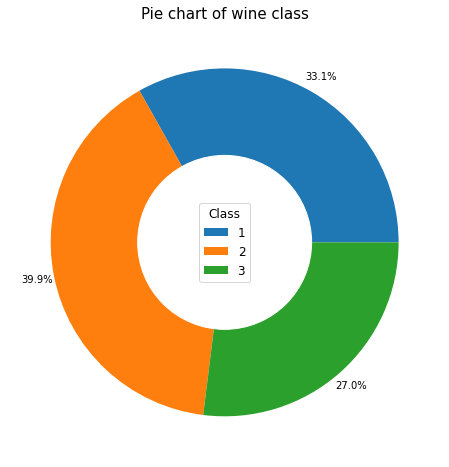

In [16]:
## Pie chart of Classes
plt.figure(figsize=(8, 8))
#plt.subplot(221)
pie_t = wine.groupby(['Class'])['Class'].count()# extract pie chart data for 'Survived' feature

labels = list(set(wine['Class']))# extract labels
labels.sort()
plt.pie(pie_t, autopct='%1.1f%%',pctdistance=1.1) # data labelformat and location spacing
central_circle = plt.Circle((0, 0), 0.5, color='white') # center hole sizing and color
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Pie chart of wine class", fontsize=15)
plt.legend(labels, loc="center", title="Class") # legend location and name
plt.show()

<font size="3">
    
The resulting pie chart display the data count for each wine class, indicating 33.1% for class 1, 39.9% for class 2, and 27% for class 3.

</font>

<AxesSubplot:>

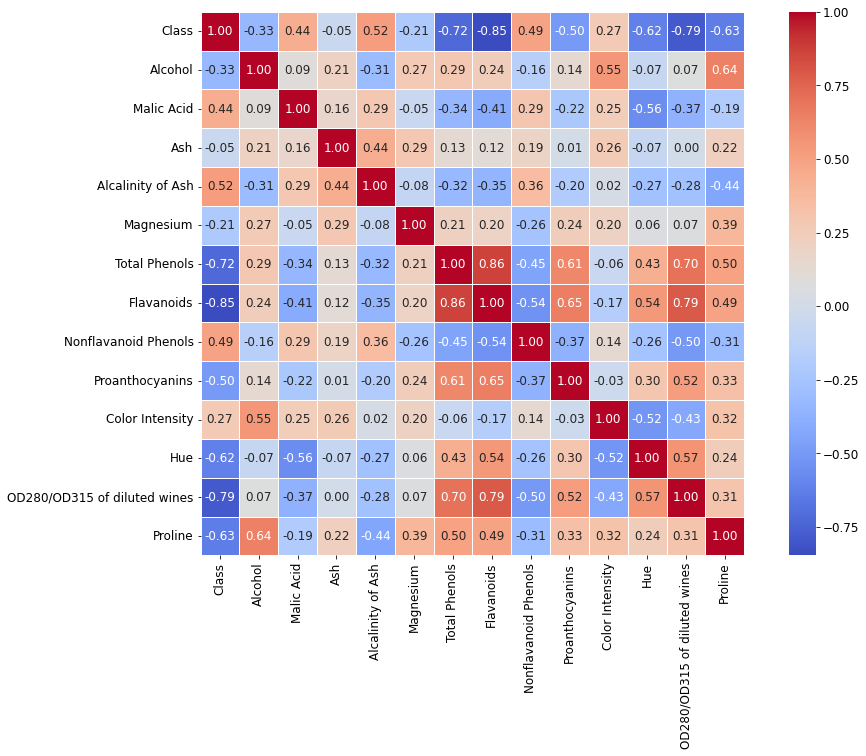

In [17]:
# Creating a heatmap of feature correlation
plt.figure(figsize=(16, 10))
hide = np.tril(wine.corr())
sns.heatmap(wine.corr(), cmap="coolwarm", annot=True,
            fmt='.2f', annot_kws={'size':12},
            linewidths=0.5, square=True,)
            #mask= hide)

<font size="3">
    
The heatmap provides insights into the correlation between different features.
    
The strongest correlation observed is between Total_Phenols and Flavanoids, with a correlation coefficient of 0.86.
    
Another notable strong correlation exists between Flavanoids and OD280, with a correlation coefficient of 0.79.
    
Alcohol demonstrates a moderate positive correlation with Color_Intensity and Proline.
    
Malic_Acid and Hue exhibit a negative correlation.
    
Flavanoids exhibit a strong positive correlation with Total_Phenols, Proanthocyanins, and OD280.
    
Nonflavanoid Phenols display a negative correlation with Flavanoids.
    
Color_Intensity and Hue are negatively correlated.
    
OD280 shows a positive correlation with Hue.
    
</font>

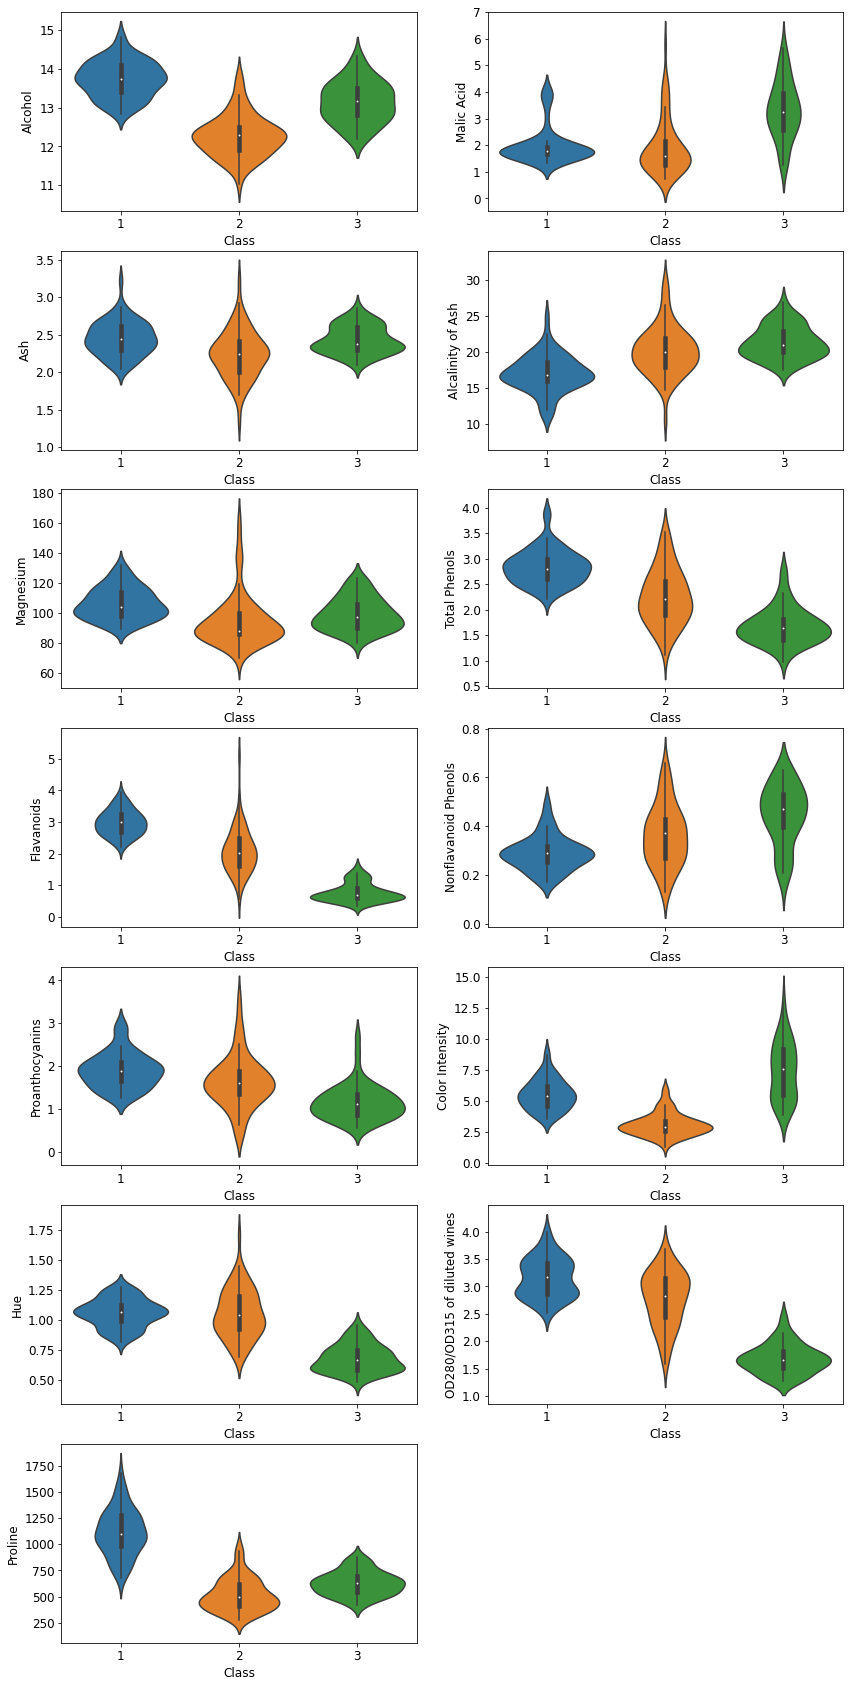

In [18]:
# Violin plot distributions group by class
plt.figure(figsize=(14, 30))

def violin(r,c,n, y):
    plt.subplot(r,c,n)
    sns.violinplot(x='Class', y=y, data=wine)

violin(7, 2, 1, 'Alcohol')
violin(7, 2, 2, 'Malic Acid')
violin(7, 2, 3, 'Ash')
violin(7, 2, 4, 'Alcalinity of Ash')
violin(7, 2, 5, 'Magnesium')
violin(7, 2, 6, 'Total Phenols')
violin(7, 2, 7, 'Flavanoids')
violin(7, 2, 8, 'Nonflavanoid Phenols')
violin(7, 2, 9, 'Proanthocyanins')
violin(7, 2, 10, 'Color Intensity')
violin(7, 2, 11, 'Hue')
violin(7, 2, 12, 'OD280/OD315 of diluted wines')
violin(7, 2, 13, 'Proline')
plt.show()

<font size="3">

Alcohol: The violin plots show that the alcohol content varies across different classes of wine. There is a noticeable difference in the distribution of alcohol levels between the classes.

Malic Acid: The violin plots indicate the distribution of malic acid content for each wine class. It helps in understanding the range and spread of malic acid levels across different classes.

Ash and Alcalinity of Ash: The violin plots provide insights into the ash content and alcalinity of ash for each wine class. It allows comparison and identification of any variations in these features among the different classes.

Magnesium: The violin plots depict the distribution of magnesium levels across wine classes. It helps in understanding the variation and range of magnesium content in different classes.

Total Phenols and Flavanoids: The violin plots provide information about the distribution of total phenols and flavonoid levels in different wine classes. It helps identify any variations or patterns in these important phenolic compounds.

Nonflavanoid Phenols and Proanthocyanins: The violin plots show the distribution of nonflavanoid phenols and proanthocyanin levels across wine classes. It allows comparison and identification of any variations in these features among the different classes.

Color Intensity and Hue: The violin plots provide insights into the distribution of color intensity and hue for each wine class. It helps in understanding the range and spread of these color-related features across different classes.

OD280/OD315 of Diluted Wines and Proline: The violin plots depict the distribution of OD280/OD315 values and proline levels across wine classes. It helps in understanding the variation and range of these features in different classes.

By examining the violin plots, we can gain insights into the distribution patterns and variations of the features across different wine classes. These visualizations facilitate the identification of potential relationships or differences between the features and their association with the wine classes.
    
</font>


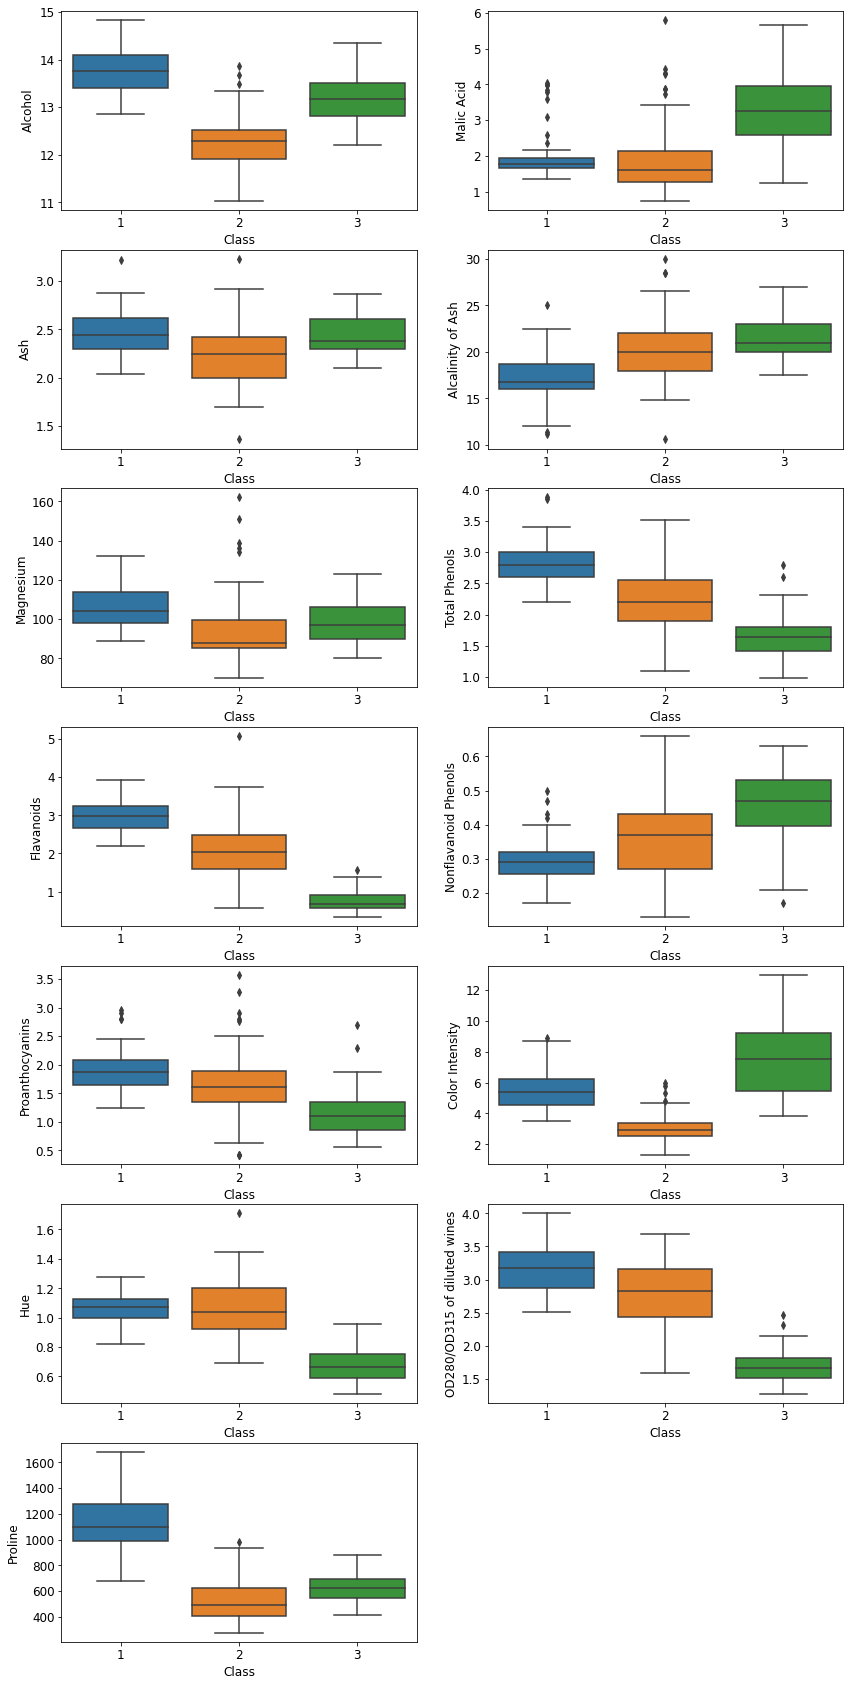

In [19]:
## Boxplot analysis
plt.figure(figsize=(14, 30))

def box(r, c, n, y):
    plt.subplot(r, c, n)
    sns.boxplot(x='Class', y=y, data=wine)

box(7, 2, 1, 'Alcohol')
box(7, 2, 2, 'Malic Acid')
box(7, 2, 3, 'Ash')
box(7, 2, 4, 'Alcalinity of Ash')
box(7, 2, 5, 'Magnesium')
box(7, 2, 6, 'Total Phenols')
box(7, 2, 7, 'Flavanoids')
box(7, 2, 8, 'Nonflavanoid Phenols')
box(7, 2, 9, 'Proanthocyanins')
box(7, 2, 10, 'Color Intensity')
box(7, 2, 11, 'Hue')
box(7, 2, 12, 'OD280/OD315 of diluted wines')
box(7, 2, 13, 'Proline')
plt.show()

<font size="3">
    
The box plots above provide another look at the distribution of the data.
    
Malic acid can be interpreted by the line closer to the bottom of its box, indicating the data is concentrated towards lower values.
    
These box plots also highlight outliers that exists for many features like Malic acid, Magnesium etc.
    
Refering to the the hue feature, it has an outlier value that exists outside of its average distribution of data.

However, outliers can be removed to potentially increase the accuracy of implemented models.

</font>

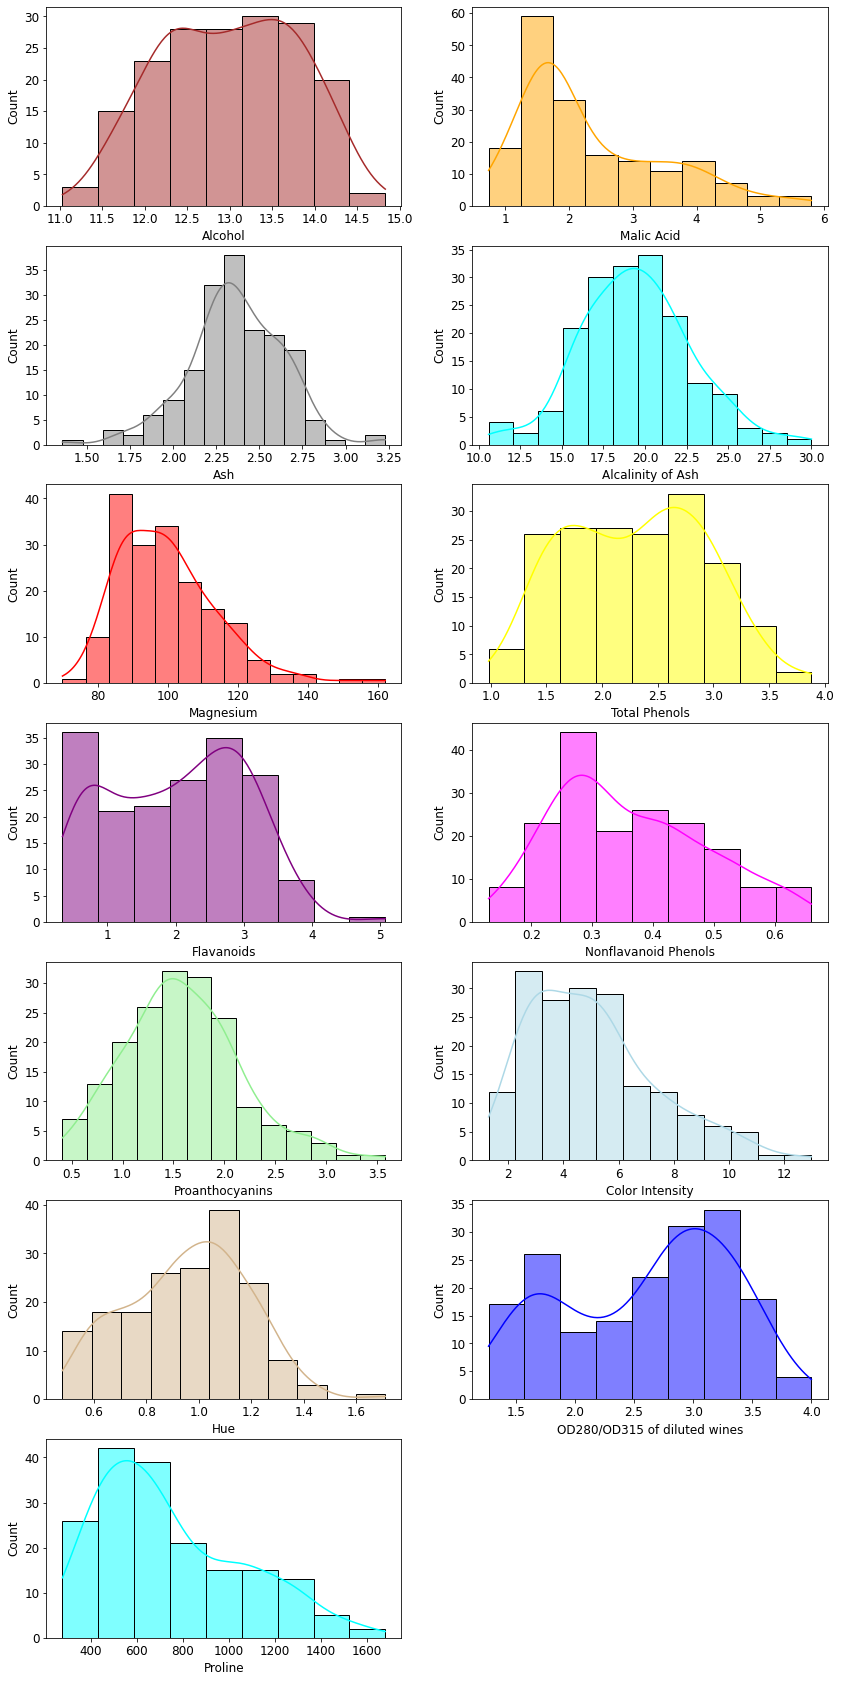

In [20]:
# Histogram plot
plt.figure(figsize=(14, 30))

def hist(r, c, n, y, color):
    plt.subplot(r, c, n)
    sns.histplot(x=y, data=wine, kde=True, color=color)

hist(7, 2, 1, 'Alcohol', 'brown')
hist(7, 2, 2, 'Malic Acid', 'orange')
hist(7, 2, 3, 'Ash', 'grey')
hist(7, 2, 4, 'Alcalinity of Ash', 'aqua')
hist(7, 2, 5, 'Magnesium', 'red')
hist(7, 2, 6, 'Total Phenols', 'yellow')
hist(7, 2, 7, 'Flavanoids', 'purple')
hist(7, 2, 8, 'Nonflavanoid Phenols', 'magenta')
hist(7, 2, 9, 'Proanthocyanins', 'lightgreen')
hist(7, 2, 10, 'Color Intensity', 'lightblue')
hist(7, 2, 11, 'Hue', 'tan')
hist(7, 2, 12, 'OD280/OD315 of diluted wines', 'blue')
hist(7, 2, 13, 'Proline', 'cyan')

#plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

<font size="4">
    
The histograms above give the insight into the distrubtion of features at top level.
    
We can see the distribution of values for each feature where, Proline, Color_Intensity, Magnesium, and Malic_Acid appear to have higher distributions of data towards lower values; to the left side of the histograms.
    
All other features appear to have relatively more balanced distribution.
    
We also can gain further insight into the distribution of the dataset by using the skew function discussed earlier.
    
</font>

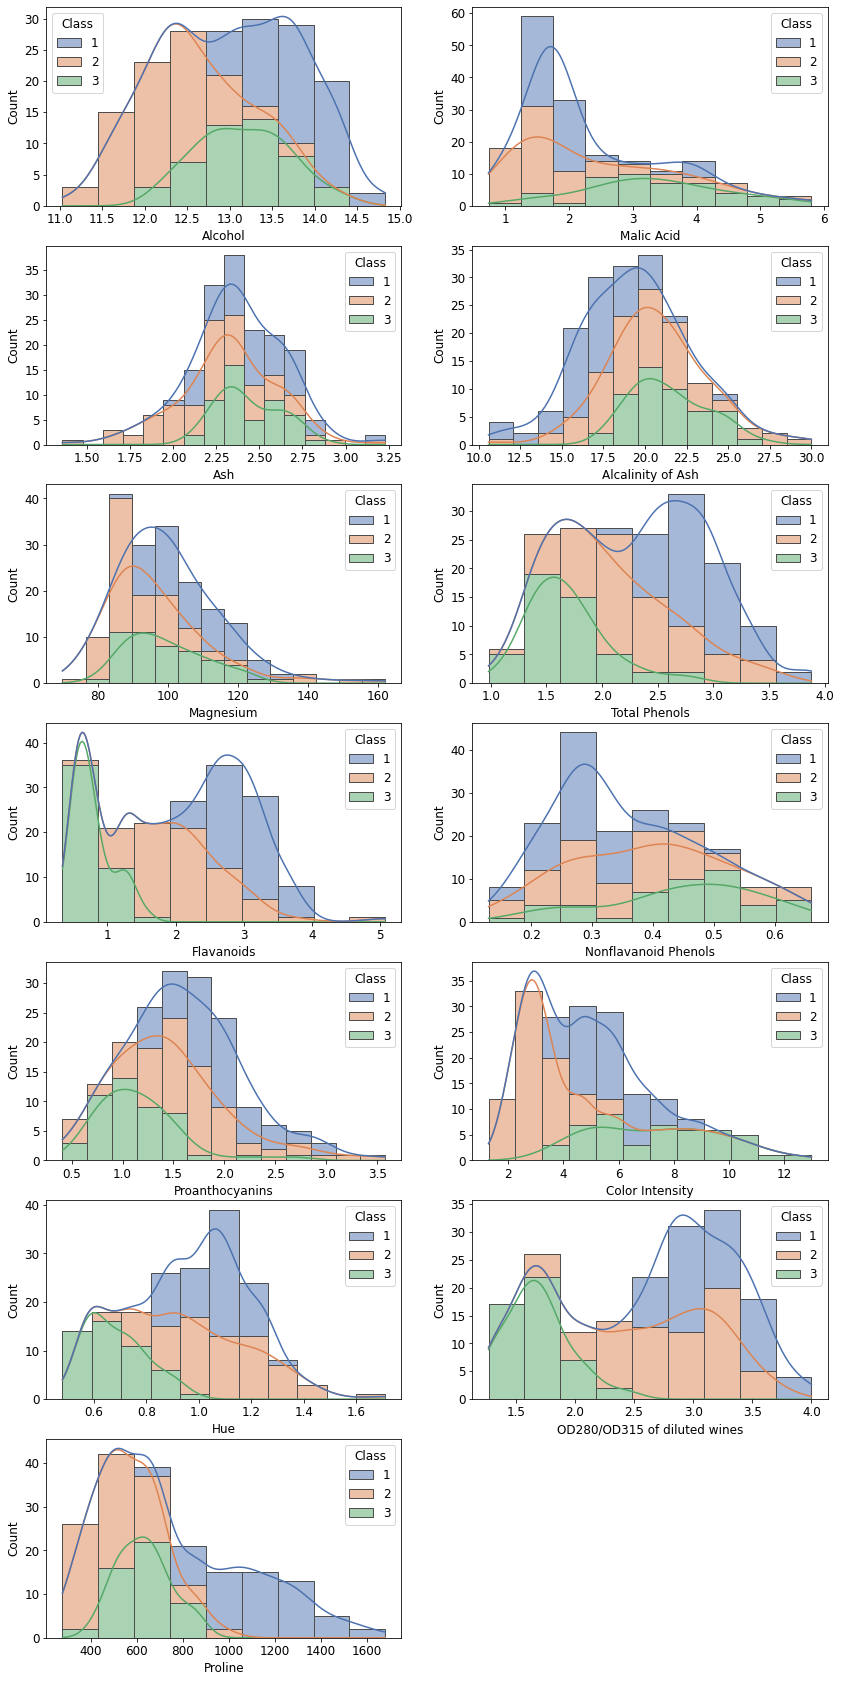

In [21]:
# Histogram plot with class
plt.figure(figsize=(14, 30))

def stack(r, c, n, x ):
    plt.subplot(r, c, n)
    #sns.histplot(x=x, data=wine, kde=True, color=color)
    #plt.subplot(221)
    sns.histplot(wine, x= x, hue="Class", multiple="stack", palette="deep",edgecolor=".3", linewidth=1,kde=True)

stack(7, 2, 1, 'Alcohol')
stack(7, 2, 2, 'Malic Acid')
stack(7, 2, 3, 'Ash')
stack(7, 2, 4, 'Alcalinity of Ash')
stack(7, 2, 5, 'Magnesium')
stack(7, 2, 6, 'Total Phenols')
stack(7, 2, 7, 'Flavanoids')
stack(7, 2, 8, 'Nonflavanoid Phenols')
stack(7, 2, 9, 'Proanthocyanins')
stack(7, 2, 10, 'Color Intensity')
stack(7, 2, 11, 'Hue', )
stack(7, 2, 12, 'OD280/OD315 of diluted wines')
stack(7, 2, 13, 'Proline')

#plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

<font size="4">
    
Distribution variation with wine classes: The histogram plots allow us to observe how the distribution of each feature varies across different wine classes. By comparing the shapes and spread, we can identify differences in the feature distributions between classes.

Mean Shift: We can clearly observe a shift in the mean values of the features with respect to each wine class. The positions of the plot indicate the central tendencies of the distributions for each class. This means that different classes exhibit different average values for the features.

Consistent Mean Distribution: The plots show that the distribution of the Ash feature remains relatively consistent across all wine classes. This suggests that the average ash content does not vary significantly between the classes.
    
</font>


## EDA SUMMARY


<font size="3">
    
Through the exploratory data analysis conducted, the following key findings were observed:

Dataset Overview: The dataset consists of 178 entries and 13 features. The data types of the columns are numerical, either float64 and int64. No null values were detected in the dataset.

Data Distribution: Violin plots, histograms, and box plots were used to examine the distribution of the data. Notably, features such as Proline, Color_Intensity, Magnesium, and Malic_Acid exhibited significant left-sided skewness. In addition, several features displayed outlier values.

Correlation Analysis: A heatmap was generated to visualize the correlations between different features. Strong correlations were observed between Total_Phenols and Flavanoids (0.86) as well as between Flavanoids and OD280 (0.79).

</font>

## DATA PREPROCESSING

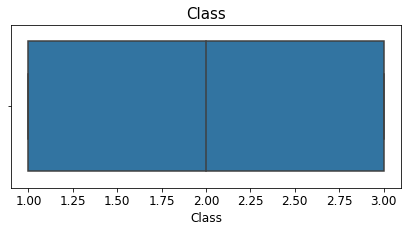

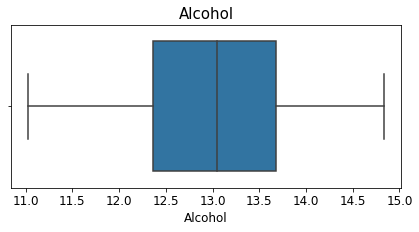

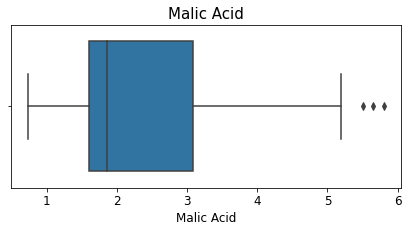

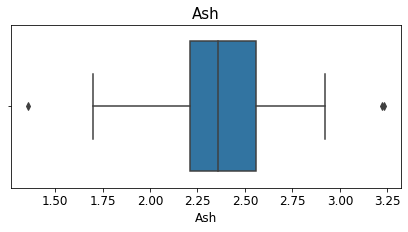

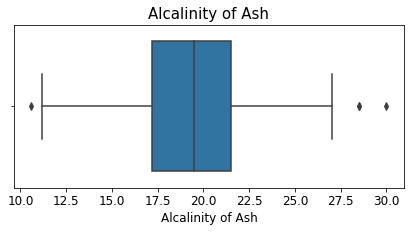

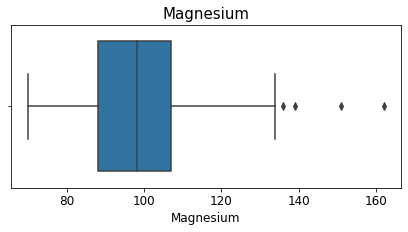

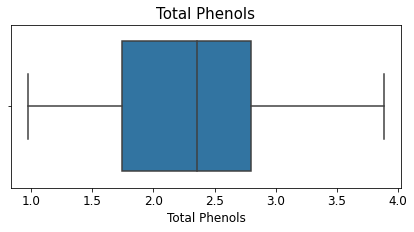

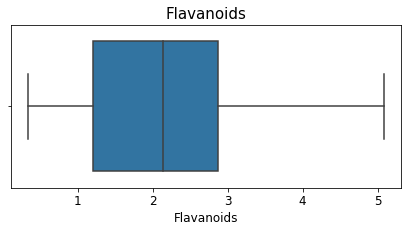

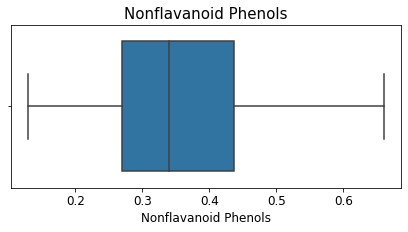

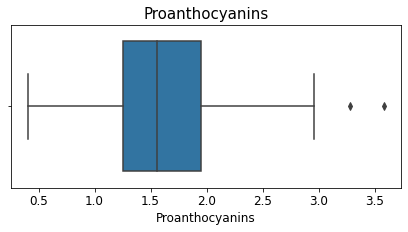

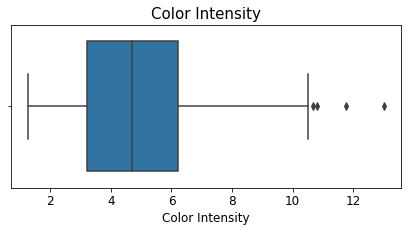

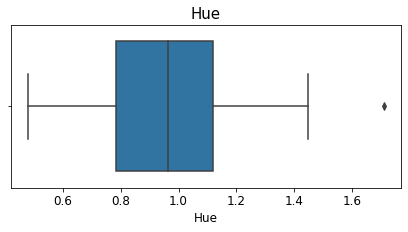

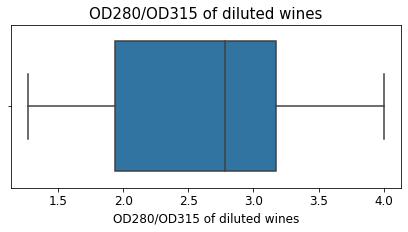

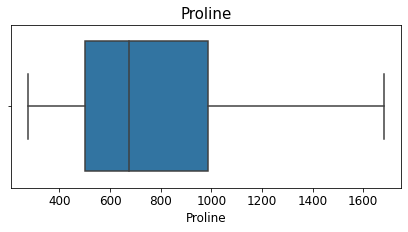

In [22]:
# Checking outliers in each feature

for col in wine.columns: # Iterate over wine data columns
    fig, ax = plt.subplots(figsize=(7, 3))
    sns.boxplot(x=wine[col], ax=ax)
    ax.set_title(col, fontsize=15)

    plt.show()

<font size="3">
    
It is observed that following features consists of ouliers.
['Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium','Proanthocyanins','Color Intensity', 'Hue']

</font>

<font size="4">
    
MANAGING OUTLIERS
    
</font>

In [23]:
## create a copy of data set
wine_1= wine.copy()

In [24]:
## Created the list featurer with outliers
outliers_features = ['Malic Acid', 'Ash', 'Alcalinity of Ash','Magnesium',
                     'Proanthocyanins','Color Intensity', 'Hue']

In [25]:
## Remove outliers from the specified features using the Interquartile Range (IQR) method

def remove_outliers(wine_1,outliers_features):
    # create copy of wine_1 copy 
    data = wine_1.copy()
    
    for feature in data:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data.loc[data[feature]>= upper_limit,feature] = upper_limit
        data.loc[data[feature]<=lower_limit,feature] = lower_limit

    return data

In [26]:
## Create data after removing the outliers from the wine dataset
wine_1 = remove_outliers(wine,remove_outliers)

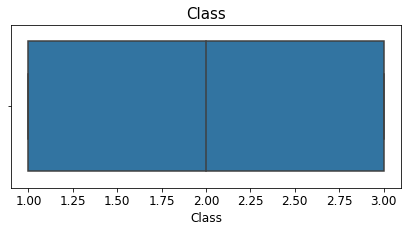

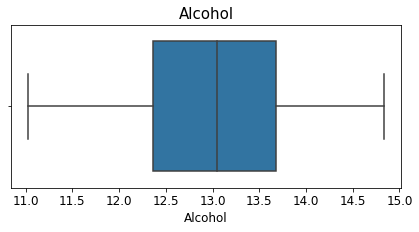

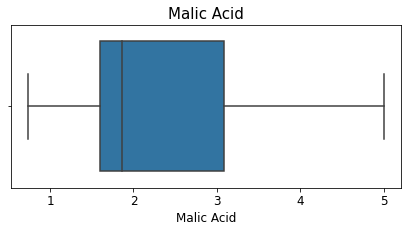

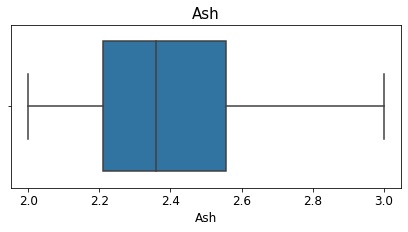

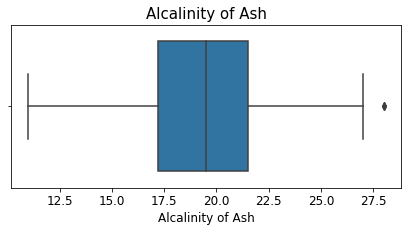

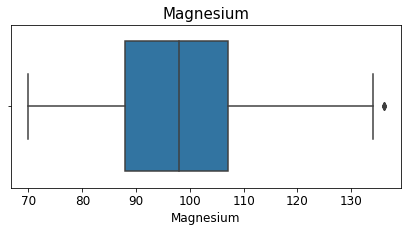

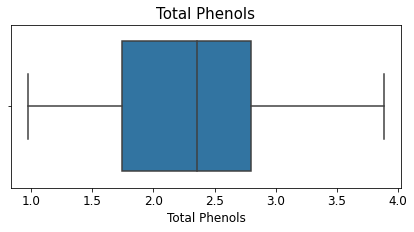

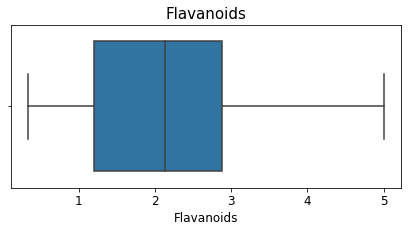

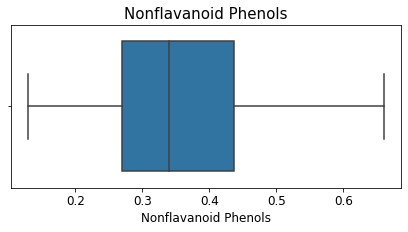

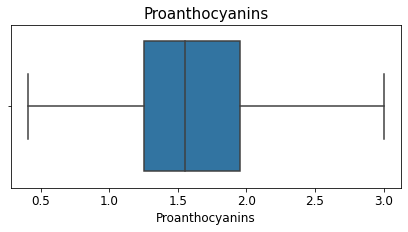

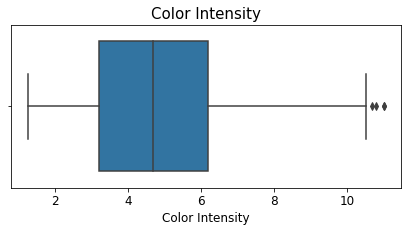

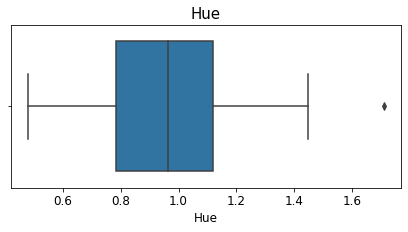

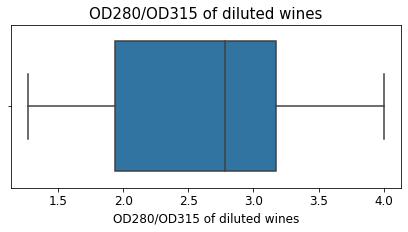

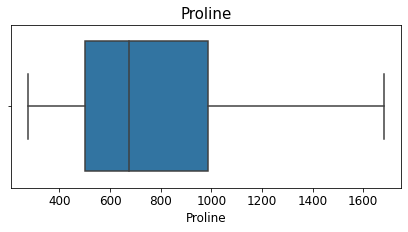

In [27]:
# Checking the outliers after clearing
for col in wine_1.columns:
    fig, ax = plt.subplots(figsize=(7, 3))
    sns.boxplot(x=wine_1[col], ax=ax)
    ax.set_title(col, fontsize=15)

    plt.show()

<font size="3">
    
    
Majority of the outliers are cleared. 


</font>

In [28]:
# Drop wine class
wine_1.drop(['Class'],axis=1, inplace = True)

In [29]:
# Applying StandardScaler()
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(wine_1)
wine_scaled = scaler.transform(wine_1)

wine_scaled

array([[ 1.51861254, -0.56825164,  0.21797995, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.50347199, -1.0117605 , ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.03327365,  1.23569619, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.81008683, -0.50290238, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.24612107, -0.03644911, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.64351059,  1.53253009, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [30]:
print("Scaled wine data Mean:\n {:.1f}".format(np.mean(wine_scaled)))
print("\nScaled wine data Standard Deviation:\n", np.std(wine_scaled))


Scaled wine data Mean:
 0.0

Scaled wine data Standard Deviation:
 1.0


<font size="3">
    
    

Principal Componenet Analysis (PCA)


</font>


In [31]:
# Applying PCA, n_components = 2
pca = PCA(n_components=2)
Feature_pca = pca.fit_transform(wine_scaled)
pca_wine = pd.DataFrame(data = Feature_pca, columns = ['PC1', 'PC2'])
#pca_wine = pd.DataFrame(data = pcs, columns = ['PC1', 'PC2','PC3', 'PC4'])
print('Shape after PCA: ', pca_wine.shape)
print('Original shape: ', wine_scaled.shape)
print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Shape after PCA:  (178, 2)
Original shape:  (178, 13)
Cumulative variance explained by 2 principal components: 55.98%


<font size="3">
    
The Principal Component Analysis (PCA) is to reduce the dimensionality of the data.
    
While we may lose some variance, using PCA will assist in creating better visualizations.
    
Above, we can see that by applying PCA, the structure of the dataset is now 178 rows and 2 columns (principal components).
    
Furthermore, we can see that using just 2 principal components captures 56% of the total variance.
    
</font>

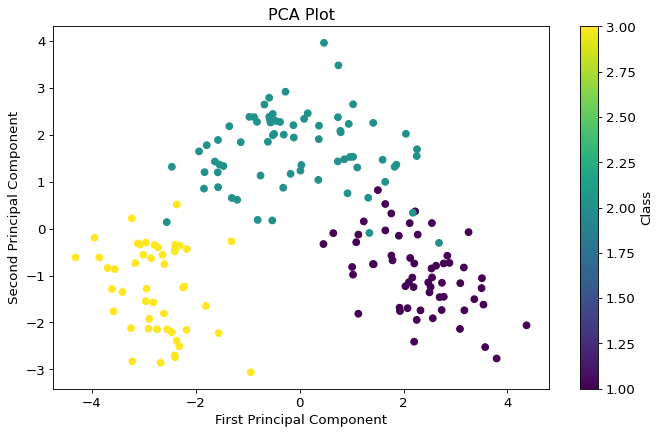

In [32]:
## ploting PCA, with n componenets with 
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(pca_wine.iloc[:, 0], pca_wine.iloc[:, 1], c=wine['Class'], cmap='viridis') # Map the color for classes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Plot')
plt.colorbar(label='Class')

plt.show()

<font size="3">

The plot above shows us the data clustered by the first and second principal components.
    
This plot doesn't provide much useful information , but used unique classes to signify distinct groups.
    
We can use k-Means next to cluster this data points into groups.
    
</font>
    

# CLUSTERING: K-Means

<font size="3">

Determine number of clusters for KMeans (Elbow-method)
    
</font>

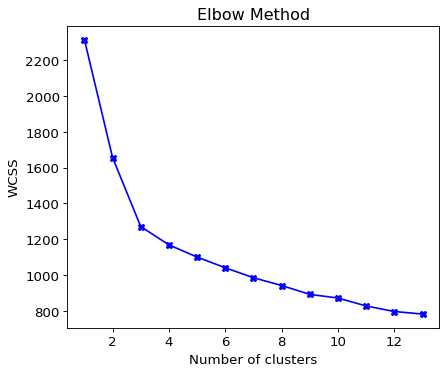

In [33]:
# Applying elbow method to determine optimal n_clusters
cluster_size = []
for i in range(1, 14):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(wine_scaled)
    cluster_size.append(kmeans.inertia_)

plt.figure(figsize=(6, 5), dpi=80)
plt.plot(range(1, 14), cluster_size, color='blue',marker = 'X')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<font size="3">

By using the Elbow method, we are able to determine the optimal number of clusters for the k-Means algorithm.
    
The plot above shows that n_clusters = 3 is the most ideal.

</font>

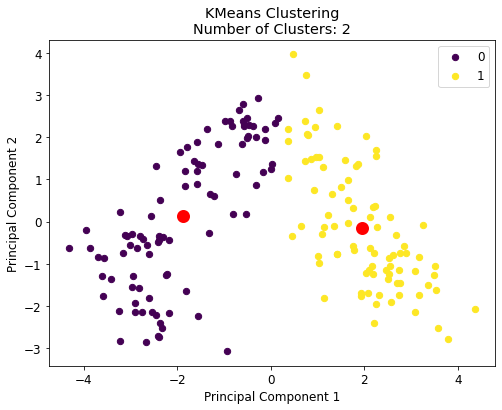

For k = 2, the Silhouette Score is: 0.46


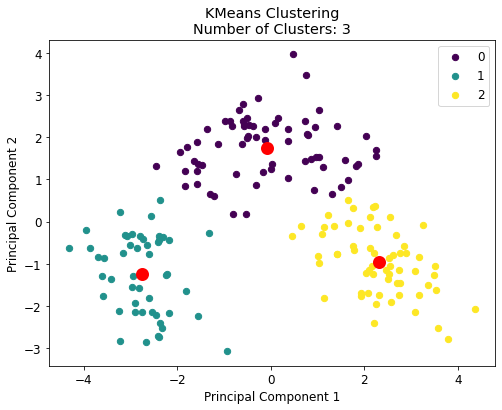

For k = 3, the Silhouette Score is: 0.56


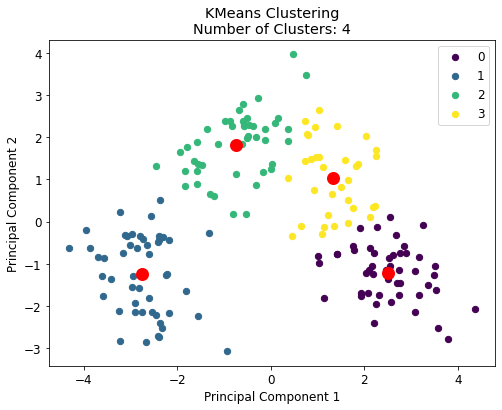

For k = 4, the Silhouette Score is: 0.49


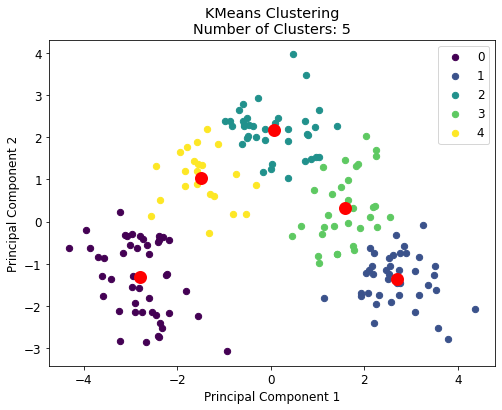

For k = 5, the Silhouette Score is: 0.44


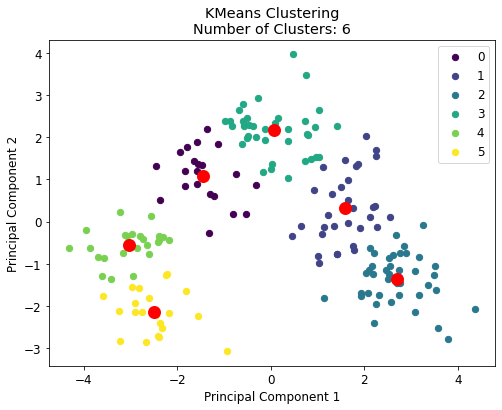

For k = 6, the Silhouette Score is: 0.43


In [34]:
# Create a function for KMeans clustering with k- number of clusters

def kmeans_clustering(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init=15, max_iter=500, random_state=42)
    clusters = kmeans.fit(pca_wine)
    cluster_labels = clusters.labels_
    num_clusters = len(set(cluster_labels))

    # Creating cluster centers
    centroids = kmeans.cluster_centers_

    df1 = pd.DataFrame({'x': pca_wine.iloc[:, 0], 'y': pca_wine.iloc[:, 1], 'label': cluster_labels})
    cmap = plt.get_cmap('viridis')
    colors = cmap(np.linspace(0, 1, num_clusters))

    fig, ax = plt.subplots(figsize=(8, 6))
    plot_group = df1.groupby('label')
    for label, items in plot_group:
        items.plot(ax=ax, kind='scatter', x='x', y='y', label=label, color=[colors[label]], s=40)
    
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="o", s=100, linewidths=3, color="red")
    
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'KMeans Clustering\nNumber of Clusters: {num_clusters}')
    plt.show()
    
    
    ## Print silhouette score
    silhouette_avg = silhouette_score(pca_wine, cluster_labels)
    print(f"For k = {n_clusters:.0f}, the Silhouette Score is: {silhouette_avg:.2f}")

# Call function with diffrent n_clusters
kmeans_clustering(2)
kmeans_clustering(3)
kmeans_clustering(4)
kmeans_clustering(5)
kmeans_clustering(6)


<font size="3">

After performing K-Means clustering with different k-values (ranging from 2 to 6), it became evident that separate clusters were formed for each value of k.
    
However, considering the guidance provided by the Elbow method, it is suggested that k = 3 is a more appropriate choice.
    
This recommendation is based on the fact that we already possess some domain knowledge about the wine classes.

</font>

# CLUSTERING: DBSCAN

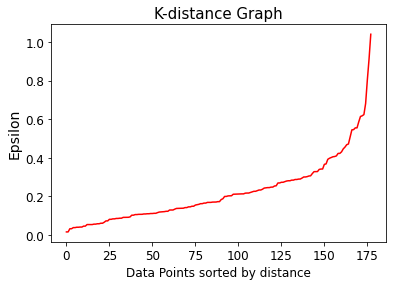

In [35]:
## K-distance graph
from sklearn.neighbors import NearestNeighbors
n_nei = NearestNeighbors(n_neighbors=2) # Sorted distances of each data point to its second nearest neighbor
nrs = n_nei.fit(pca_wine.iloc[:, [0, 1]].values)
distances, indices = nrs.kneighbors(pca_wine.iloc[:, [0, 1]].values)

# Plotting K-distance Graph
distances = np.sort(distances[:, 1], axis=0)
plt.figure(figsize=(6, 4))
plt.plot(distances, color = 'red')
plt.title('K-distance Graph', fontsize=15)
plt.xlabel('Data Points sorted by distance', fontsize=12)
plt.ylabel('Epsilon', fontsize=14)
plt.show()


<font size="3">

The plot shows the sorted distances of each data point to its second nearest neighbor. The x-axis represents the data points sorted by distance, while the y-axis represents the epsilon values between a data point and its second nearest neighbor.
    
The purpose of this plot is to determine an appropriate value for the epsilon parameter in density-based clustering algorithms such as DBSCAN. The epsilon value determines the radius within which neighboring points are considered as part of the same cluster.
    
By examining the K-distance graph, we can look for a significant change in the slope of the curve. This point often represents a reasonable epsilon value, indicating the distance threshold for defining clusters. The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is approximately 0.6 in this case.
</font>

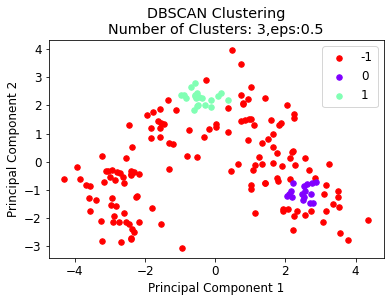

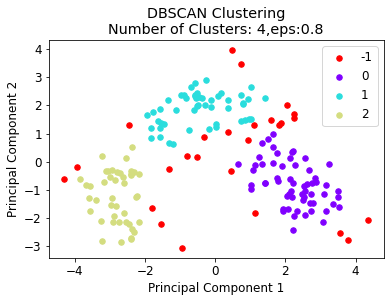

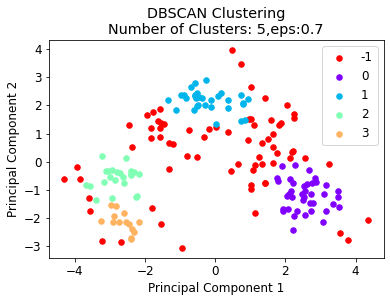

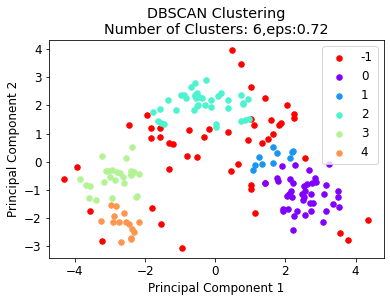

In [36]:
## Assign pca-wine data points
X = pca_wine.values

## created a function to carry differen eps and min_sample numbers
def dbclusters(eps, min_samples):
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    cluster = clustering.labels_
    num_clusters = len(set(cluster)) 
    #- (1 if -1 in cluster else 0) # 
    
    df = pd.DataFrame({'x': X[:, 0], 'y': X[:, 1], 'label': cluster}) # Create dataframe with x, y and label
    #print(df)

    cmap = plt.get_cmap('rainbow') # Assign color pattern
    colors = cmap(np.linspace(0, 1, num_clusters)) # assogn colors for cluster a range between 0-1

    fig, ax = plt.subplots(figsize=(6, 4))
    plot_group = df.groupby('label')
    for label, items in plot_group:
        items.plot(ax=ax, kind='scatter', x='x', y='y', label=label, color=[colors[label]],s=30)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'DBSCAN Clustering\nNumber of Clusters: {num_clusters},eps:{eps}')
    plt.show()
    
    #Print silhouette score
    #silhouette_avg = silhouette_score(X, cluster)
    #print(f"For eps = {eps:.2f}, the Silhouette Score is: {silhouette_avg:.2f}")
    #return num_clusters
    
## Call function with diffrent eps values
dbclusters(0.5,14)
dbclusters(0.8,14)
dbclusters(0.7,14)
dbclusters(0.72,14)

<font size="3">

DBSCAN successfully identified noise points that did not belong to any cluster. These outliers were labeled as -1 in the clustering results and were represented by red dots in the scatter plot.

 
The minimum_samples can be derived from a number of dimensions in the data set (D), as minimum_samples ≥ D + 1. Larger values are usually better for data sets with noise and will form more significant clusters. In this analysis, used as 14 (13+1) as min_samples.
    
Based on the Silhouette Score analysis, it was found that the cluster configuration with 3 clusters, excluding the noise points, yielded better performance. Therefore, grouping the data into 3 clusters would be appropriate based on silhouette score evaluation as well.

</font>


    
# CLUSTERING: Agglomerative 


In [37]:
## Created function with n_clusters with linkage specifications

def ai(n_clusters, linkage):
    agc = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    agc.fit(pca_wine)
    labels = agc.labels_
    num_clusters = len(set(labels))
    
    df1 = pd.DataFrame({'x': pca_wine.iloc[:, 0], 'y': pca_wine.iloc[:, 1], 'label': labels})
    cmap = plt.get_cmap('rainbow')
    colors = cmap(np.linspace(0, 1, num_clusters))# Assign colors for clusters with range of 0-1

    fig, ax = plt.subplots(figsize=(8, 6))
    plot_group = df1.groupby('label')
    for label, i in plot_group:  #Iterates over the clusters, for each cluster, color, and cluster items are obtained
        ax.scatter(i['x'], i['y'], label=label, color=[colors[label]], s=40)
    
    plt.title('Agglomerative Clustering\nNumber of Clusters: {}, Linkage: {}'.format(n_clusters, linkage))
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    
    plt.show()
    
    ## Print  silhouette score
    silhouette_avg = silhouette_score(pca_wine, labels)
    print(f"For k = {n_clusters:.0f}, the Silhouette Score is: {silhouette_avg:.2f}")
    


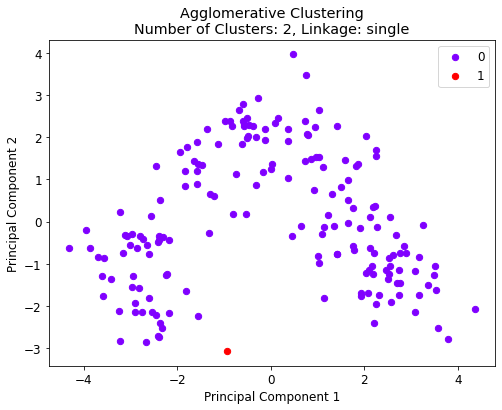

For k = 2, the Silhouette Score is: 0.12


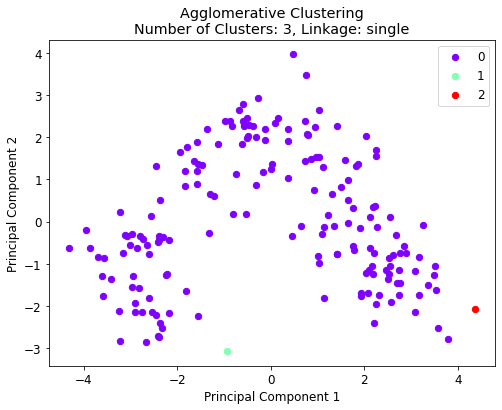

For k = 3, the Silhouette Score is: -0.02


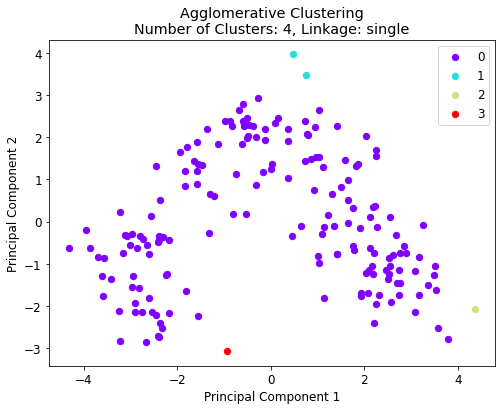

For k = 4, the Silhouette Score is: -0.22


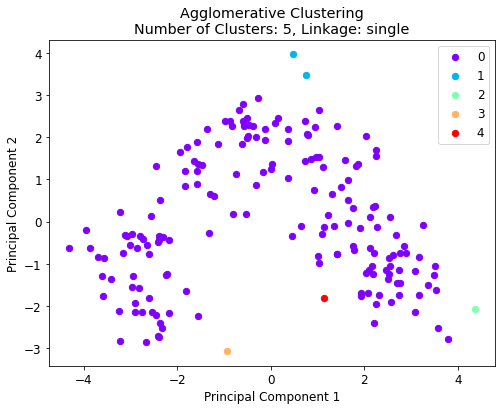

For k = 5, the Silhouette Score is: -0.31


In [38]:
# Call the function for AgglomerativeClustering with linkage as single

ai(2,'single')
ai(3,'single')
ai(4,'single')
ai(5,'single')

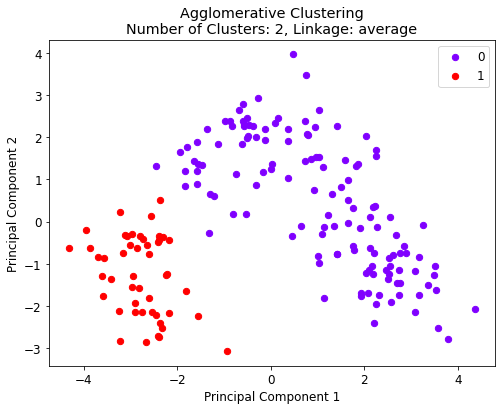

For k = 2, the Silhouette Score is: 0.47


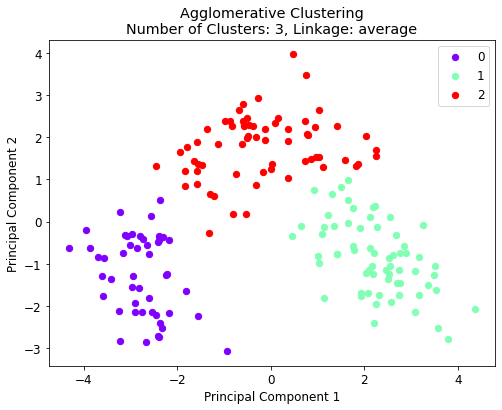

For k = 3, the Silhouette Score is: 0.55


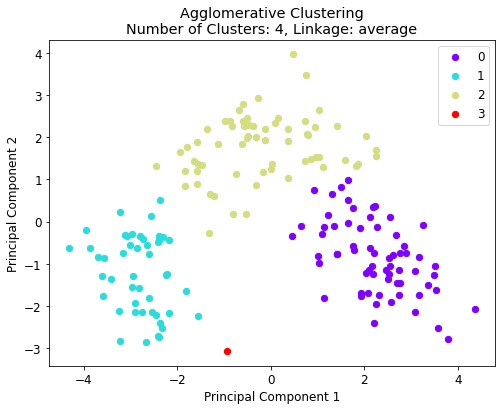

For k = 4, the Silhouette Score is: 0.48


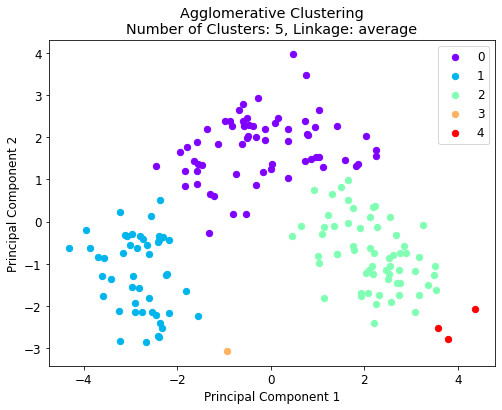

For k = 5, the Silhouette Score is: 0.41


In [39]:
# Call the function for AgglomerativeClustering with linkage as average

ai(2,'average')
ai(3,'average')
ai(4,'average')
ai(5,'average')

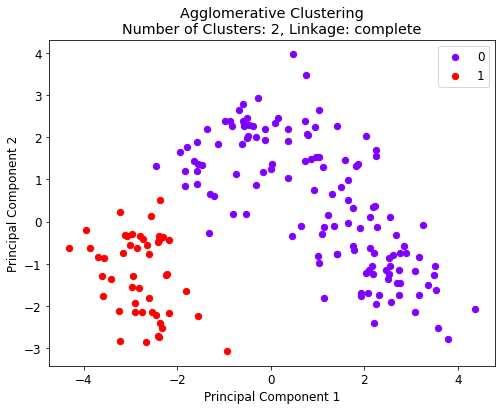

For k = 2, the Silhouette Score is: 0.47


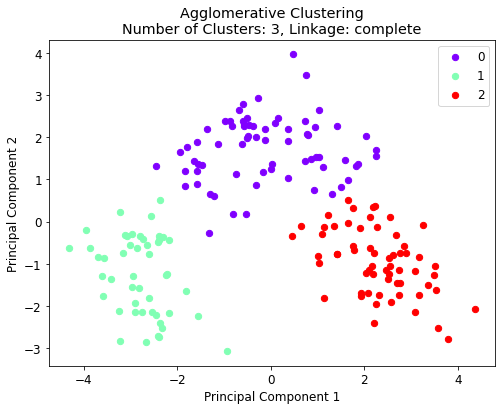

For k = 3, the Silhouette Score is: 0.56


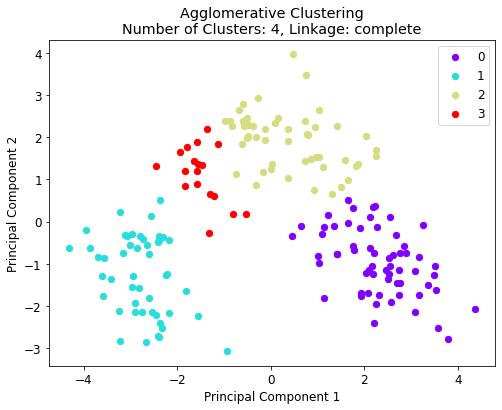

For k = 4, the Silhouette Score is: 0.47


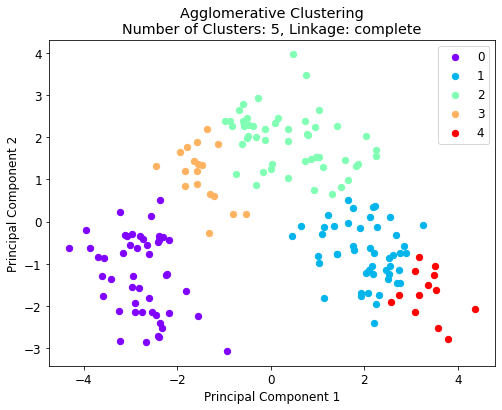

For k = 5, the Silhouette Score is: 0.37


In [40]:
# Call the function for AgglomerativeClustering with linkage as Complete
ai(2,'complete')
ai(3,'complete')
ai(4,'complete')
ai(5,'complete')

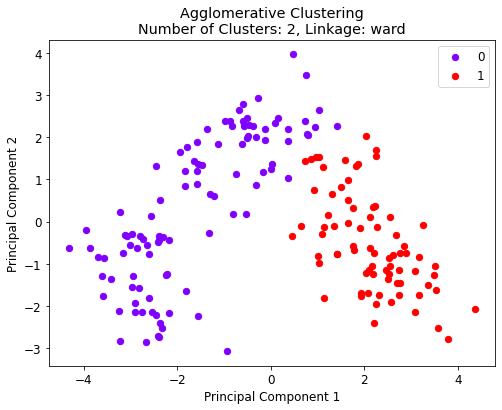

For k = 2, the Silhouette Score is: 0.46


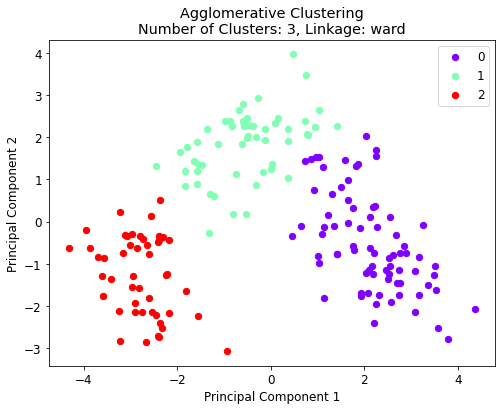

For k = 3, the Silhouette Score is: 0.54


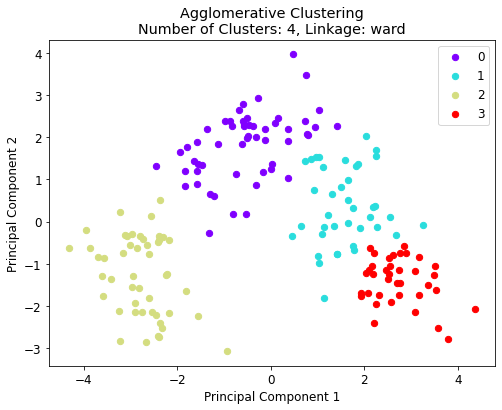

For k = 4, the Silhouette Score is: 0.48


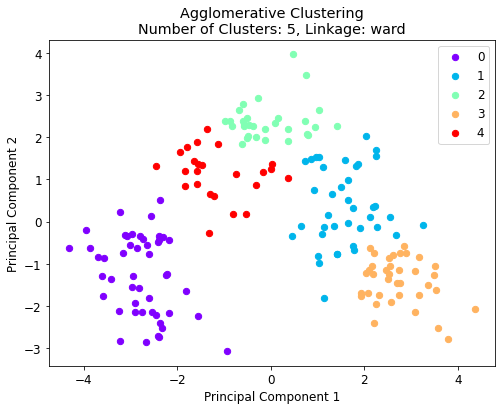

For k = 5, the Silhouette Score is: 0.43


In [41]:
# Call the function for AgglomerativeClustering with linkage as Ward
ai(2,'ward')
ai(3,'ward')
ai(4,'ward')
ai(5,'ward')

<font size="3">
    
Silhouette score with different linkages
    
</font> 

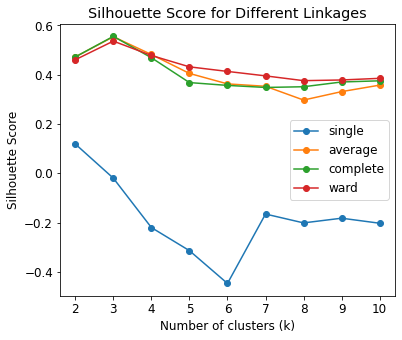

In [42]:
linkages = ['single', 'average', 'complete', 'ward']
silhouette_scores = []

for linkage in linkages:
    scores = []
    for i in range(2, 11):
        agc = AgglomerativeClustering(n_clusters=i, linkage=linkage)
        agc.fit(pca_wine)
        scores.append(silhouette_score(pca_wine, agc.labels_))
    silhouette_scores.append(scores)

plt.figure(figsize=(6, 5))
for i, linkage in enumerate(linkages):
    plt.plot(range(2, 11), silhouette_scores[i], marker='o', label=linkage)


plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Linkages')
plt.legend()
plt.show()

<font size="3">

Agglomerative clustering, specifically with complete linkage, provided a clear separation of clusters when applied to the data.
    
The cluster separation was evident for various numbers of clusters ranging from 2 to 5. 
    
Although other linkage options such as single, average, and complete were considered, the complete option demonstrated superior performance in accurately separating the clusters, similar to the performance of K-means clustering.
    
The Silhouette Score can be used as a key matrix in determining the number of clusters.
    
</font>

<font size="3">
    
Review clusters in Dendogram
    
</font> 

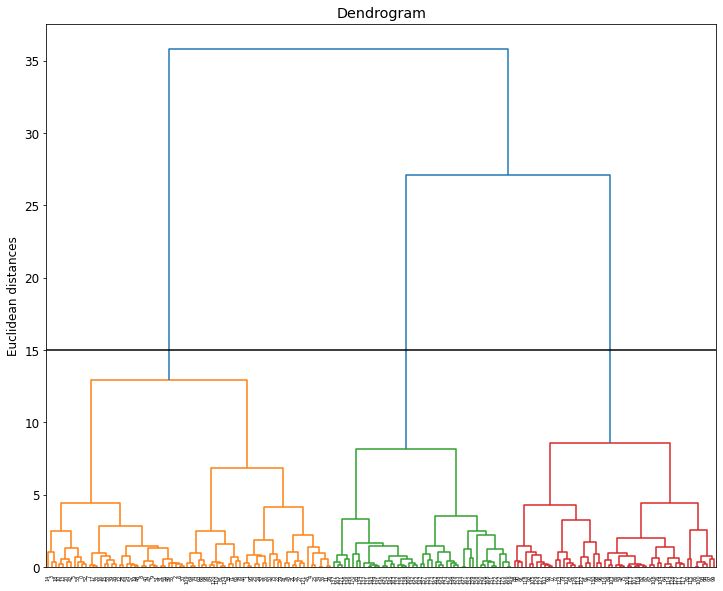

In [43]:
## Creating Dendrogram 
max_d = 15 # threshhold / cut-off value
  
dendrogram = sch.linkage(pca_wine, method='ward') # Apply ward as linkage
plt.figure(figsize=(12, 10))
plt.title("Dendrogram")
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(dendrogram)
  
# Cutting the dendrogram at max_d
plt.axhline(y=max_d, c='k')

# Displaying the plot
plt.show()

<font size="3">
    
Although we have already concluded that n_clusters = 3 is optimal for k-Means, we can also employ a dendrogram to confirm and visualize this number of clusters.
    
Above, we can see three uniquely colored subgroups (orange, green, and red). These groups are created by three main splits which are based upon their hierarchical distances.

Dendrograms are typically used for agglomerative hierarchical clustering, this visualization is still helpful here, as it further demonstrates the ideal number of clusters that we used agglomerative clustering later.
    
</font>

# APPLY: t-SNE

c:\users\h207171\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\h207171\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


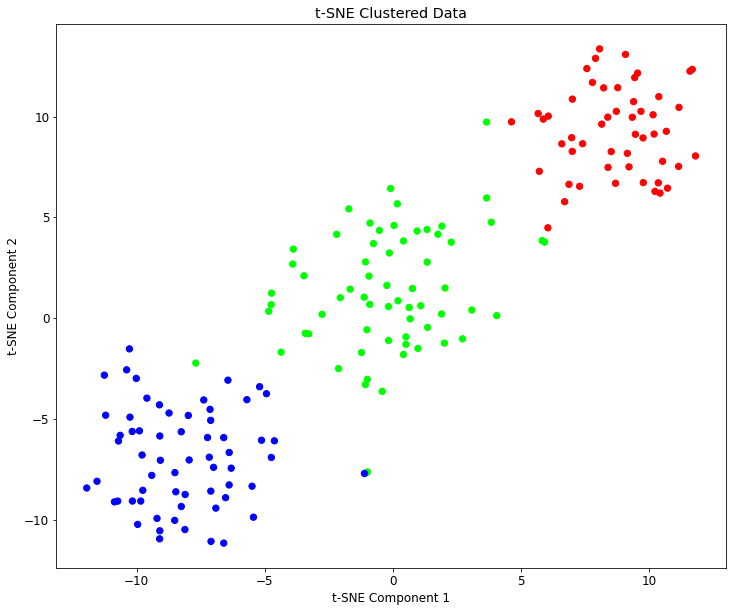

In [44]:
## Apply t-SNE to determine the number of clusters
## using wine scaled data

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

kmeans = KMeans(n_clusters= 3,n_init = 10)  # Update the number of clusters by Kmeans 
cluster_labels = kmeans.fit_predict(wine_scaled)

tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(wine_scaled)
tsne_data = pd.DataFrame(data = X_tsne, columns = ['tsne comp. 1', 'tsne comp. 2'])

# Plotting t-SNE Clusters
plt.figure(figsize=(12,10))
plt.scatter(tsne_data.iloc[:,0], tsne_data.iloc[:,1], c=cluster_labels, cmap="brg", s=40)
plt.title('t-SNE Clustered Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

<font size="3">
    
To further explore, the t-SNE (t-distributed Stochastic Neighbor Embedding) visualization was employed. t-SNE is a dimensionality reduction technique commonly used for visualizing high-dimensional data in lower-dimensional space while preserving local structure. By applying t-SNE to the data, we can observe the data points in a two-dimensional scatter plot and gain insights into the natural grouping or clustering tendencies of the data.
    
The plot above shows the data clustered by using t-SNE. Unlike k-Means, which clustered the data into three groups based upon their first and second principal components, determined by the PCA, the t-SNE algorithm has plotted the data by its first and second t-SNE components. Because of this, the k-Means and t-SNE plots appear to have clustered the data differently.
    
It's not uncommon to observe some overlap between clusters when using t-SNE for dimensionality reduction and visualization. t-SNE is a non-linear technique that aims to preserve local structure, which means it may not always perfectly separate clusters, especially when there is inherent overlap or when the data is inherently difficult to cluster.

The overlap between clusters in the t-SNE visualization could indicate instances where data points from different clusters are close to each other in the high-dimensional space and cannot be perfectly separated in the reduced two-dimensional space. 
    
</font>


# Silhouette Score Plot

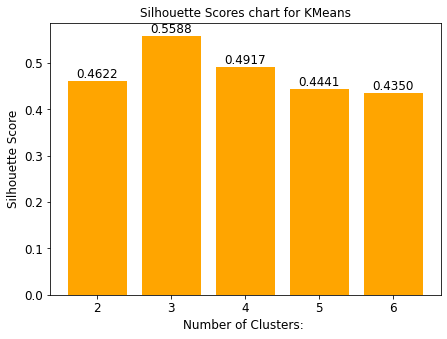

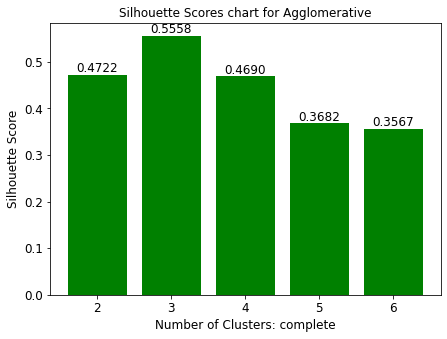

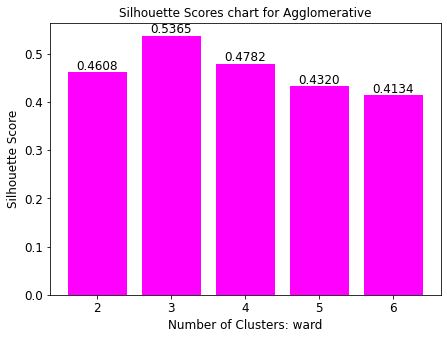

In [45]:
# Load data 
X = pca_wine

# Created a function for with parameters for silhouette_scores plot
def silh_scores_chart(model_type, start, end,color, linkage):
    model_types = {
        'KMeans': KMeans(n_init=10),
        'Agglomerative': AgglomerativeClustering(linkage = linkage),
        #'DBSC': DBSCAN()
    }
    
    silhouette_scores = [] # Empty list score list 
    model = model_types[model_type]

    # Iiterate over the range of start to end+1
    # Updates the number of clusters for the model
    # Calculate average silhouette coefficient 
    for n_clusters in range(start, end + 1):      
        model.set_params(n_clusters=n_clusters)
        labels = model.fit_predict(X)
        silhouette_ave = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_ave)

    # Bar chart of models for comparison
    plt.figure(figsize=(7, 5))
    plt.bar(range(start, end + 1), silhouette_scores, color=color)
    plt.xlabel('Number of Clusters: {}'.format(linkage), fontsize=12)
    plt.ylabel('Silhouette Score', fontsize=12)

    # Adding data labels to the bar graph
    for i, score in enumerate(silhouette_scores):
        plt.text(i + start, score, f'{score:.4f}', ha='center', va='bottom', color='black')

    plt.title(f'Silhouette Scores chart for {model_type}', fontsize=12)
    plt.show()

# Function call
silh_scores_chart('KMeans', 2, 6, 'orange',linkage = '')
silh_scores_chart('Agglomerative', 2, 6, 'green',linkage = 'complete')
silh_scores_chart('Agglomerative', 2, 6, 'magenta',linkage = 'ward')


<font size="3">
    
The Silhouette Score plot was utilized to evaluate the optimal number of clusters for the wine dataset. The plot confirmed that grouping the data into 3 clusters was an optimal solution, as it yielded a higher Silhouette Score. This reinforced the previous determination of 3 clusters using the Elbow Method and Dendrogram.

To compare performance, both K-means and Agglomerative clustering were employed. The evaluation revealed that K-means achieved a reasonably better Silhouette Score as compared to Agglomerative clustering. This suggests that K-means provided a better overall clustering solution for the wine dataset.
    
</font>

# FINAL MODEL - KMeans

In [46]:
## Finalized  Model- KMenas with 3 clusters
kmeans = KMeans(n_clusters = 3, n_init = 15, max_iter = 500, random_state = 42)
kmeans.fit(pca_wine)
labels =kmeans.labels_
num_clusters = len(set(labels))

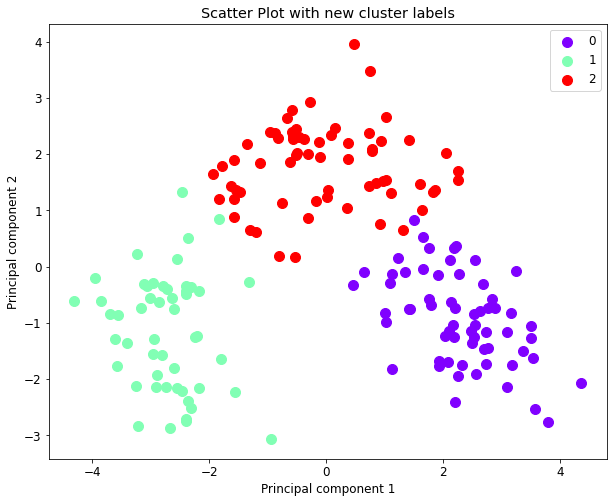

In [47]:
## Visualize the clusters in a scatter plot
df = pd.DataFrame({'x': pca_wine.iloc[:, 0], 'y': pca_wine.iloc[:, 1], 'label': cluster_labels})
cmap = plt.get_cmap('rainbow') # Assign color pattern
colors = cmap(np.linspace(0, 1, num_clusters)) # Assign colors for clusters in the range between 0-1

fig, ax = plt.subplots(figsize=(10, 8))
for label, items in df.groupby('label'):
    items.plot(ax=ax, kind='scatter', x='x', y='y', label=label, color=colors[label][None], s=100)

plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Scatter Plot with new cluster labels')
plt.legend()
plt.show()


    
## Inertia and cluster centers location
    



In [48]:
## Inertia and cluster centers
print('Inertia:\n', kmeans.inertia_)
print('Cluster centers:\n', kmeans.cluster_centers_)

Inertia:
 264.20473497721025
Cluster centers:
 [[-0.08854411  1.74521878]
 [-2.74593221 -1.23394135]
 [ 2.30445373 -0.954291  ]]



    
## Predicted cluster classes
    


In [49]:
## Predict data points in each groups of wine data 
y_kmeans = kmeans.fit_predict(pca_wine)
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])


    
## Dataset with new clusters
    


In [50]:
## Add  the new cluster in to cluster_data
cluster_data = wine.copy()
cluster_data ['clusters'] = y_kmeans
cluster_data 

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline,clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [51]:
## Print the class and clusters
data1 = cluster_data.groupby(['Class'])['Class'].count()
data1

Class
1    59
2    71
3    48
Name: Class, dtype: int64

In [52]:
## Print the class and clusters
data2 = cluster_data.groupby(['clusters'])['clusters'].count()
data2

clusters
0    68
1    49
2    61
Name: clusters, dtype: int64

In [53]:
## Print the class and clusters
data = cluster_data [['Class','clusters']]
data

,Class,clusters
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
173,3,1
174,3,1
175,3,1
176,3,1


In [54]:
## Print the unique clusters
cluster_data ['clusters'].unique()

array([2, 0, 1])

In [55]:
## Print the unique clusters
cluster_data ['Class'].unique()

array([1, 2, 3], dtype=int64)


    
# MODEL EVALUATION
    
    




<font size="3">
    
   
The new clusters are labeled with 0, 1, and 2. Each of these Wine Clusters can compare since we have the actual Wine Class.
    

Wine class 1 is mapped to Wine Cluster 2
    
Wine class 2 is mapped to Wine Cluster 0
    
Wine class 3 is mapped to Wine Cluster 1
    
    
For evaluation purposes, the new Wine Cluster are remapped to 1, 2, and 3 to reflect the Wine Class labels and make comparisons more intuitive
           
</font>

In [56]:
# Import classification matrices

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Map the new clusters name 0,1 and 3 to corresponding true classess 1,2,3
wine_class = wine['Class'] # Assign true labels
class_mapping = {0: 2, 1: 3, 2: 1} # Map data 

# Map the cluster labels to new labels using np. where option
wine_cluster = np.where(y_kmeans == 0, class_mapping[0],
                          np.where(y_kmeans == 1, class_mapping[1], class_mapping[2]))

# Performance matrics
conf_matrix = confusion_matrix(wine_class, wine_cluster)
accuracy = accuracy_score(wine_class, wine_cluster)
precision = precision_score(wine_class, wine_cluster, average='micro')
recall = recall_score(wine_class, wine_cluster, average='micro')
f1_sc = f1_score(wine_class, wine_cluster, average='micro')
classification_rep = classification_report(wine_class, wine_cluster)

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", round(accuracy,2))
print("Precision (micro-averaged):", round(precision,2))
print("Recall (micro-averaged):", round(recall,2))
print("F1 Score (micro-averaged):", round(f1_sc,2))
print("Classification Report:\n", classification_rep)

Confusion Matrix:
 [[58  1  0]
 [ 3 67  1]
 [ 0  0 48]]
Accuracy: 0.97
Precision (micro-averaged): 0.97
Recall (micro-averaged): 0.97
F1 Score (micro-averaged): 0.97
Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.98      0.97        59
           2       0.99      0.94      0.96        71
           3       0.98      1.00      0.99        48

    accuracy                           0.97       178
   macro avg       0.97      0.98      0.97       178
weighted avg       0.97      0.97      0.97       178



<font size="3">
    

True Class 1 (Row 1):

True Positives (TP): There are 58 instances of true class 1 that are correctly classified as class 1.
False Positives (FP): There is 1 instance of true class 1 that is incorrectly classified as class 2.
False Negatives (FN): There are 0 instances of true class 1 that are misclassified as other classes (class 2 and class 3).
    
True Class 2 (Row 2):

True Positives (TP): There are 67 instances of true class 2 that are correctly classified as class 2.
False Positives (FP): There are 3 instances of true class 2 that are incorrectly classified as class 1, and 1 instance that is incorrectly classified as class 3.
False Negatives (FN): There are 0 instances of true class 2 that are misclassified as other classes (class 1 and class 3).
    
True Class 3 (Row 3):
    
True Positives (TP): There are 48 instances of true class 3 that are correctly classified as class 3.    
False Positives (FP): There are 0 instances of true class 3 that are incorrectly classified as other classes (class 1 and class 2). False Negatives (FN): There are 0 instances of true class 3 that are misclassified as other classes (class 1 and class 2).
    
Overall, the confusion matrix shows that the model is performing well, with the majority of instances being correctly classified (high true positive values along the diagonal). The false positive and false negative values are relatively low, indicating that the model is making few misclassifications. 
    
</font>

## Visualizations of clusters and characteristics


In [57]:

# New data dictionary
new_data = {
    'wine_class': wine_class,
    'wine_cluster': wine_cluster
}

# Create dataframe 
chart = pd.DataFrame(new_data)

# Create a groupby data for chart 
chart_p = chart.groupby(['wine_cluster', 'wine_class'])['wine_cluster'].size().unstack()

chart_p

wine_class,1,2,3
wine_cluster,,,
1,58.0,3.0,NaN
2,1.0,67.0,NaN
3,NaN,1.0,48.0


In [58]:
# Generate bar chart to visualise the groupings 
p= chart_p.plot_bokeh(kind="bar",title=" New wine cluster group distribution",
                   figsize =(900,700), 
                   xlabel = "Wine Cluster ",
                   ylabel=" Count",
                   stacked = False,)


<font size="3">
    
    
As observed, the new cluster displays the following variations when compared to the actual class.

In cluster1, 58 items were correctly classified as belonging to the original class 1, but 3 items were misclassified, and they actually belong to the original class 2.

For cluster2, 67 items were correctly classified as belonging to the original class 2, but 1 item was misclassified, and it actually belongs to the original class 1.

In cluster3, 48 items were correctly classified as belonging to the original class 3, but 1 item was misclassified, and it actually belongs to the original class 2.
    
</font>

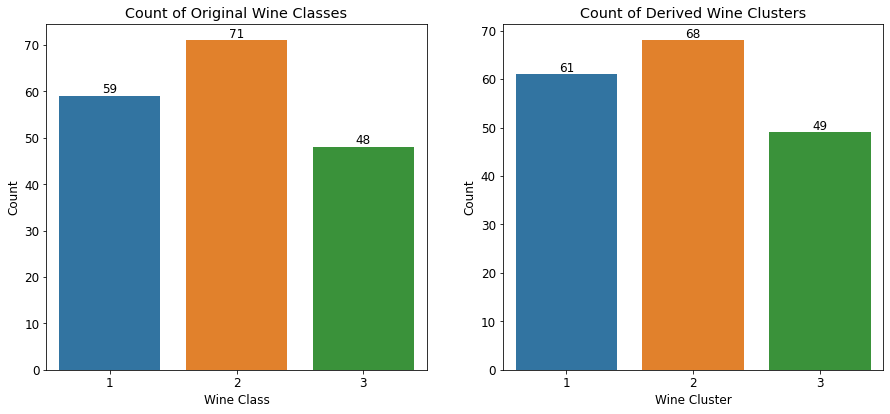

In [59]:
# Plot number in each wine class as compared to the clusters derived.
# For original wine classes
wine_class = chart.groupby(['wine_class'])['wine_class'].count() # Extract data for wine class
plt.figure(figsize=(15, 14))

plt.subplot(221)
sns.barplot(x=wine_class.index, y=wine_class.values, order=wine_class.index)
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.title('Count of Original Wine Classes')
plt.grid(False)

# Add data labels to each bar
for i, v in enumerate(wine_class.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

## For Wine clusters
wine_cluster = chart.groupby(['wine_cluster'])['wine_cluster'].count()

plt.subplot(222)
sns.barplot(x=wine_cluster.index, y=wine_cluster.values, order=wine_cluster.index)
plt.xlabel('Wine Cluster')
plt.ylabel('Count')
plt.title('Count of Derived Wine Clusters')
plt.grid(False)

# Add data labels to each bar
for i, v in enumerate(wine_cluster.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


<font size="3">
    
Comparison chart between origial class with derived class (clusters)
    
</font>

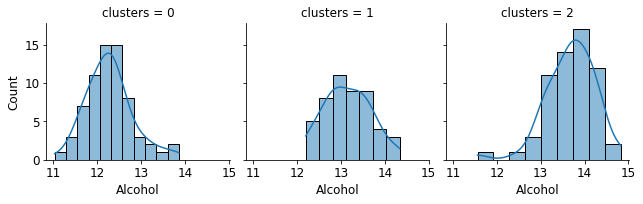

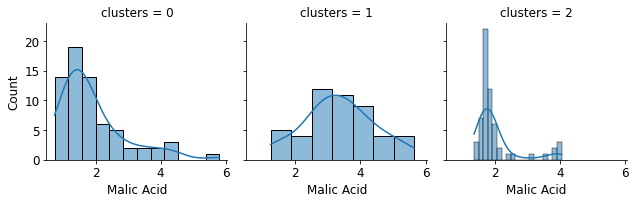

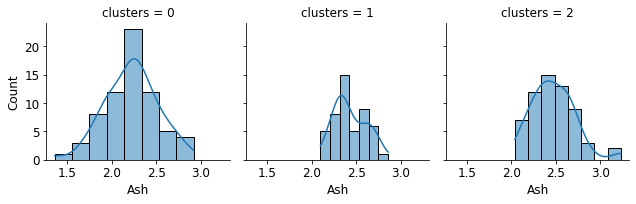

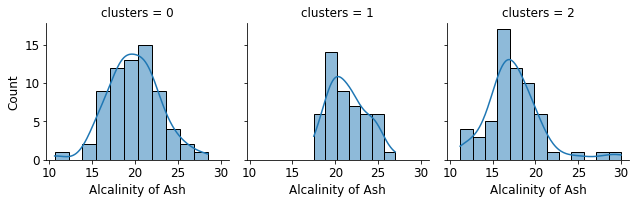

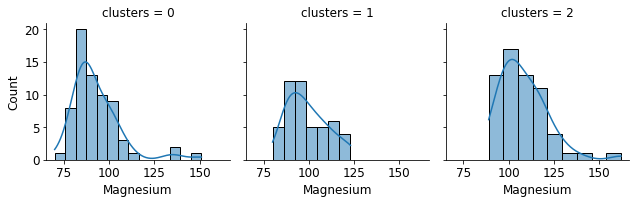

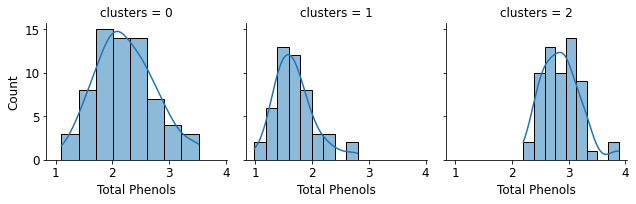

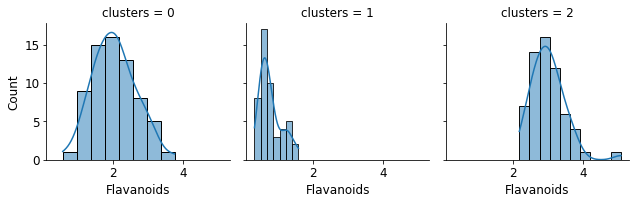

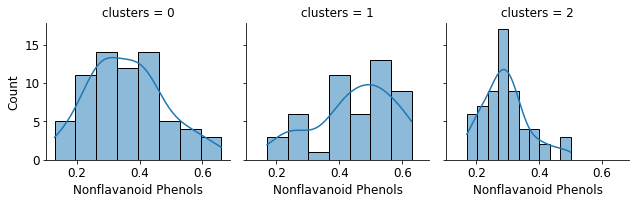

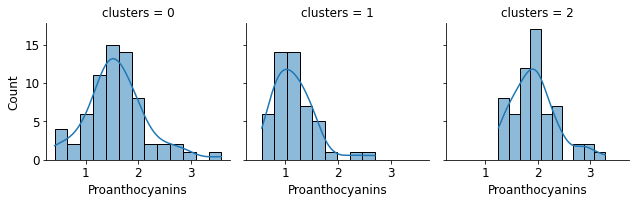

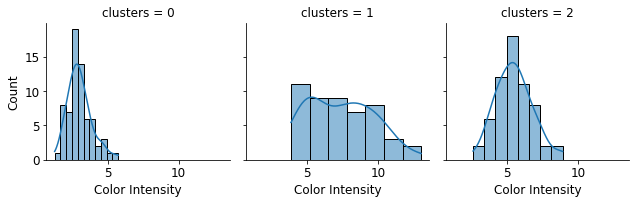

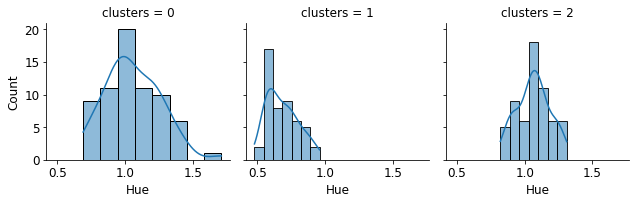

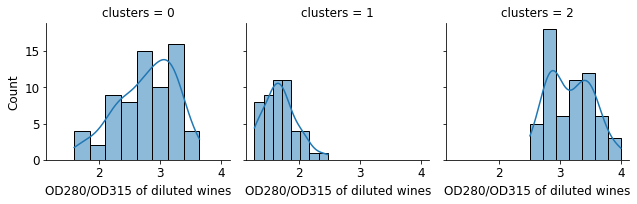

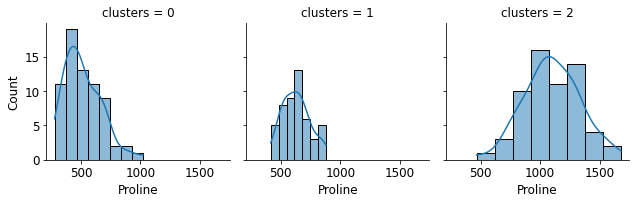

In [60]:
## Function to plot histogram for each cluster elements
def hist_grid(col_name):
    grid = sns.FacetGrid(cluster_data, col="clusters")
    grid.map_dataframe(sns.histplot, kde=True, x=col_name)
    
col_names = ['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash',
                'Magnesium', 'Total Phenols', 'Flavanoids',
                'Nonflavanoid Phenols', 'Proanthocyanins',
                'Color Intensity', 'Hue', 'OD280/OD315 of diluted wines',
                'Proline']

for i in col_names:
    hist_grid(i)
plt.show()

<font size="3">
    
Distribution chart of new cluster elements
    
</font>

In [61]:
# Assign column names with nely generated wine clusters

col_names = cluster_data[['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash',
                'Magnesium', 'Total Phenols', 'Flavanoids',
                'Nonflavanoid Phenols', 'Proanthocyanins',
                'Color Intensity', 'Hue','OD280/OD315 of diluted wines',
                'Proline','clusters']]

# Grouping the data by year, gender with value
new_clrs = col_names.groupby(['clusters']).mean()

# Generate bar graph
p= new_clrs.plot_bokeh(kind="bar",title=" Wine clusters- mean ingredient distribution",
                   figsize =(900,900), 
                   xlabel = "Wine Cluster",
                   ylabel="Mean value", stacked = False,
                       legend='top_left')

In [62]:
## Print the mean of all elements in each clusters
new_clrs

,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
clusters,,,,,,,,,,,,,
0,12.276324,1.906176,2.222500,19.888235,92.735294,2.237500,2.037500,0.360147,1.593971,3.030882,1.057882,2.773824,514.750000
1,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020
2,13.686721,2.006066,2.472295,17.495082,108.131148,2.854918,3.009180,0.292295,1.931148,5.482295,1.063607,3.171148,1101.540984


<font size="3">
    
    
We can focus on the elements whose means exhibits considerable variations between the different groups, as they hold significant importance in distinguishing each wine group.

The elements that demonstrate such variations are Flavanoids, Magnesium, Total Phenols, Color intensity, OD280/OD315 of diluted wines, and Proline.
    
While variations can also be observed in other elements, they do not appear to be as significant. 

Therefore, we can infer that these elements play a crucial role in differentiating each wine group.


    
</font>

In [63]:
## Plot of key elements that determining the wine classes. 

col_names = cluster_data[['Flavanoids',
                          'Magnesium',
                          'Total Phenols',
                          'Color Intensity',
                          'OD280/OD315 of diluted wines',
                          'Proline',
                          'clusters']]

# Grouping the data by year, gender with value
crtical_elements = col_names.groupby(['clusters']).mean()

# Generate bar graph
p = crtical_elements.plot_bokeh(kind="bar",
                                title=" Wine clusters- key element characteristics",
                                figsize =(700,600),
                                xlabel = "Wine Cluster",
                                ylabel="Mean value", stacked = False,
                                legend='top_left')


<font size="5">
    
    
Key charecteristics of each clusters 0, 1 , 2:
</font>


<font size="3">
          
  
    
Magnesium:        low,   medium,      high
    
Total Phenols:   medium,      low,     high
    
Flavanoids:      medium,      low,     high

    
Color Intensity:   low,     high,   medium

    
OD280/OD315 of
diluted wine:   medium,      low,     high
    
Proline:           low,   medium,     high
    
</font>

# SUMMARY


<font size="3">
    
The objective of this analysis was to explore unsupervised clustering techniques for grouping a wine dataset based on its characteristics. The dataset underwent preprocessing steps, including scaling with a Standard Scaler, clearing of outliers and dimensionality reduction using Principal Component Analysis (PCA). The results of PCA indicated that 2 principal components captured 56% of the variance, while 3 components captured around 2/3 of the variance.

Various clustering algorithms, including K-means, DBSCAN, and Agglomerative, were applied to cluster the data. K-means proved to be a reliable and efficient algorithm; however, determining the number of clusters (k) in advance is necessary. The Elbow Method suggested 3 clusters as the optimal choice, which was reinforced by a dendrogram analysis.

The DBSCAN algorithm was then employed to determine the number of clusters using the optimal epsilon (eps) value derived from the nearest neighbor method. An eps value of 0.8 yielded the best results, and it was observed that the eps value is sensitive to the number of clusters.

Additionally, t-SNE was used to compare the clustering results. The t-SNE algorithm generated a plot based on its components, showing different cluster positions compared to the k-means plot. However, t-SNE successfully grouped the data into 3 clusters.

The silhouette score plot further confirmed the suitability of 3 clusters, with the highest score achieved for K-means with n_clusters = 3. Three distinct clusters were identified based on their centroids.

Overall, K-means demonstrated reliability and speed as a clustering algorithm, while t-SNE provided a non-linear representation that can be more challenging to interpret compared to PCA.

Lastly, the wine data clusters were plotted, and the number of data points within each cluster was compared with the original wine class data counts. It was observed that the cluster members were classified with extreme accuracy, indicating the effectiveness of the clustering algorithm in capturing the underlying patterns of the wine dataset.

In conclusion, the combination of preprocessing techniques, cluster analysis, and evaluation metrics provided valuable insights into the grouping of the wine dataset, enabling a better understanding of its inherent structure and characteristics.

 
References : 
    
https://www.kaggle.com/code/conradkleykamp/wine-analysis-clustering
    
https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/
    
   
</font>
